In [1]:
import pandas as pd
import pandas_datareader.data as web
from datlib.plots import * 
from datlib.FRED import *

data_codes  = {"Homeownership Rate in ND": "NDHOWN",
"Nationwide Homeownership Rate": "RSAHORUSQ156S",
"ND Per Capita Income": "NDPCPI",
"30-Year Mortgage Rate": "MORTGAGE30US",
"Lumber Price": "WPUSI004011",
"Unemployment Rate": "NDUR",
"ND Population (1000s)": "NDPOP",
"ND GDP": "NDNQGSP",
"ND Construction Wages": "NDWCON",
"State Property Tax Collections": "NDPROPTAX",
"Median Listing Price in ND":"MEDLISPRIND",
"Home Vacancy Rate":"NDHVAC",
"House Price Index":"NDSTHPI",
"Home Values in the United States":"HOOREVLMHMV",
"Student Loans": "SLOAS",
"Inflation": "T10YIE",
"Poverty": "PEAAND38000A647NCEN",
"ND Bachelor's Degree Holders Rate": "GCT1502ND",
"Rental Vacancy Rate for North Dakota": "NDRVAC",
"US Population (1000s)": "POPTHM"}

start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start, end = end, freq = "Y")

In [2]:
data

,Homeownership Rate in ND,Nationwide Homeownership Rate,ND Per Capita Income,30-Year Mortgage Rate,Lumber Price,Unemployment Rate,ND Population (1000s),ND GDP,ND Construction Wages,State Property Tax Collections,Median Listing Price in ND,Home Vacancy Rate,House Price Index,Home Values in the United States,Student Loans,Inflation,Poverty,ND Bachelor's Degree Holders Rate,Rental Vacancy Rate for North Dakota,US Population (1000s)
DATE,,,,,,,,,,,,,,,,,,,,
2002-12-31,69.4,67.950,27218.0,6.537308,165.700000,3.375000,638.168,NaN,493513.0,1375.0,NaN,2.5,176.8850,15572.95650,NaN,NaN,68625.0,NaN,11.2,287954.583333
2003-12-31,68.7,68.275,29678.0,5.826981,172.375000,3.475000,638.817,NaN,533614.0,1435.0,NaN,2.0,186.1075,17115.09025,NaN,1.955360,65063.0,NaN,9.8,290626.250000
2004-12-31,70.0,69.025,30107.0,5.839231,202.741667,3.383333,644.705,NaN,606832.0,1478.0,NaN,1.5,199.3200,19436.46475,NaN,2.440240,67625.0,NaN,10.4,293262.333333
2005-12-31,68.5,68.875,31967.0,5.866731,196.266667,3.308333,646.089,24700.000,636631.0,1536.0,NaN,1.3,215.3400,22233.87450,NaN,2.474760,70588.0,NaN,8.5,295992.916667
2006-12-31,68.3,68.775,33357.0,6.413269,185.291667,3.100000,649.422,26500.650,715982.0,1621.0,NaN,1.1,228.7850,23847.33775,500.005992,2.483720,71059.0,25.6,8.9,298817.666667
2007-12-31,66.0,68.150,36709.0,6.337308,175.333333,3.016667,652.822,29075.425,795718.0,1787.0,NaN,1.5,240.1475,23651.65000,565.282305,2.348048,72242.0,25.7,7.6,301696.166667
2008-12-31,66.6,67.800,41075.0,6.027170,166.375000,3.108333,657.569,31874.450,934128.0,1901.0,NaN,1.3,247.7200,21772.79900,645.614568,1.893546,70654.0,26.9,8.2,304543.083333
2009-12-31,65.7,67.350,40212.0,5.036538,153.058333,3.916667,664.968,32226.000,963292.0,1942.0,NaN,1.7,251.4300,19888.80775,734.442060,1.605760,72911.0,25.8,7.0,307240.083333
2010-12-31,67.1,66.825,44284.0,4.689808,169.741667,3.691667,674.752,35676.150,1018256.0,2125.0,NaN,1.5,254.5150,19164.41475,828.126698,2.063665,81176.0,27.6,7.4,309774.500000


In [3]:
data["ND Population"] = data["ND Population (1000s)"] * 1000

# Introduction

The premise of this research is to evaluate what factors impact homeownership rates in the state of North Dakota. Homeownership rates have overall fallen in the last 20 years, despite mortgage rates steadily declining over the same period. Is there a cultural shift? Are there legitimate Macroeconomic factors influencing consumer decision-making? Have stricter regulations on homeownership/mortgage loans since the Great Recession played a role? This paper will attempt to answer these questions.

# Literature Review

In 'Homeownership and the American Dream', the authors evaluate the decline in American homeownership from three different perspectives: An international perspective, a demographic perspective, and a financial perspective. This study also utilized a regression approach that uses "a series of dummy variables so that, in each broad category, the coefficient should be interpreted as relative to the left-out variable."

In 'Student Loans and Homeownership', the authors evaluate the impact that student loan debt has on homeownership. The article begins by acknowledging the overall decline in homeownership. "While the overall US homeownership rate has fallen markedly since the onset of the Great Recession, the decline has been particularly pronounced among young households. The homeownership rate for households headed by individuals aged 24–32 fell 9 percentage points (from 45% to 36%) between 2005 and 2014, nearly twice as large as the 5 percentage point drop in homeownership for the overall population (Current Population Survey)." This study held other variables constant by using a control group and a treatment group. " The treatment group is the set of individuals who attended a public 4-year university at any point before age 23, while the control group is all others. Treated individuals are directly exposed to the tuition changes, and their debt balances reflect this. Control group individuals are not directly affected by the tuition at schools they did not attend, and so they absorb any variation in economic conditions at the state level that may be driving tuition rates."

'Trends in Homeownership: Race, Demographics, and Income' explores the homeownership trends in different demographic categories. These categories include race, age, sex, marital status, children, region, and educational attainment. The article explores these areas and found trends that would suggest both housing ownership rates increasing and decreasing. They wrote, "On the one hand, the movement of the baby-boom generation into the prime homeownership ages, the increase in the level of education, and the increase in real incomes suggest that, in the absence of changes in government policy or other changes in narrow housing market conditions, homeownership rates should have risen over the last 20 years. On the other hand, the decline in the proportion of households headed by married people, the increase in households headed by women, and the increase in the number of nonwhite households would tend to have decreased the overall homeownership rate."

'The Sustainability of Homeownership: Factors Affecting the Duration of Homeownership and Rental Spells' places an emphasis on the area of ownership and rental spells when evaluating homeownership rates. According to Huduser, "Homeownership rates are determined not only by the percentage of people that begin a spell of owning, but also by the rate of exiting ownership. Thus the duration of owning is an important, though neglected, determinant of the nation’s homeownership rate. The annual rate of terminating spells of ownership is an indicator of spell length." This is similar to how when we measure population we must take into account both birthrates and deathrates. Therefore, understanding homeownership rates boils down to us evaluating why people are not only choosing to not own in the first place, but also choosing to sell their home then proceed to renting.

'Housing Prices and Macroeconomic Factors: Prospects within the European Monetary Union' evaluates how economic variables plays a role in the construction of new houses and housing prices. "The empirical analysis was carried out using quarterly data from 1981 to 1999. The variables used in the empirical analysis are the housing price index (HP) based on construction prices, the mortgage interest rate proxied by the average rate of housing loans maturing in 15 years (INTR), prices measured by the consumer price index (P), and employment measured by the employment index (EMPL)."

### Benefits and Drawbacks of Homeownership

Low-income homeownership: Benefits, barriers and predictors for families in rural areas evaluated the benefits and barriers of homeownership for low-income families. The authors identified many benefits such as asset accumulation, better physical and mental health for household members, increased life satisfaction, and better outcomes for children. They named off barriers including low credit scores, responsibility for maintenance costs, lack of affordable housing stock, and housing discrimination regarding the availability of suitable neighborhoods.

According to "Is Homeownership Still an Effective Means of Building Wealth for Low-income and Minority Households? (Was it Ever?)", financial benefits of homeownership include federal income tax benefits, creating wealth, home value appreciation, and a hedge against rent inflation. This same study also evaluated the financial risks associated with home ownership.

Brookings took a different approach in Renting the American Dream: Why homeownership shouldn’t be a prerequisite for middle-class financial security. This article looked mostly into why homeownership isn't a requirement for financial security. One argument that this article made was that it is a major financial risk to purchase a home. "Owners may realize large wealth gains over their initial investment, but there are no guarantees against losing wealth – and house price growth varies widely across the U.S."

Homeownership is painted as the means to achieving the American Dream and the key to long-term economic success. The Economist states, "But lower homeownership need not be a cause for concern. For one thing, owning a home is not necessarily the route to riches that many people believe it to be (see article). The evidence that home ownership is good for society is, in fact, fairly weak. There are many counter-examples to Singapore. Romania probably has the world’s highest home-ownership rate, at 96%, but it has its fair share of social problems. Switzerland, at the other end of the scale, nonetheless has low crime and high social trust." This sentiment goes against the idea that homeownership is a necessary facet of society.

### Housing Policy following the Great Recession

The federal government began to tighten mortgage lending directly after the Great Recession. This is due to the "housing bubble" that is thought to have been caused by subprime mortgage lending. According to Housing Policy, Monetary Policy, and the Great Recession, "On September 6, 2008, the GSEs were taken into conservatorship. Under federal management, they continued to tighten their standards. By this phase, mortgages from the Federal Housing Administration (FHA), guaranteed through Ginnie Mae (GNMA), were also picking up much of the slack. The FHA tends to serve more marginal borrowers with lower average credit scores. But the FHA was also tightening its lending standards. The net effect was that the average credit score of originated mortgages for mortgages of all types continued to rise to more than 760. Originations to credit scores above 760 continued at the precrisis pace. Originations to lower credit scores continued to drop." Additionally, there were more regulations set in place to ensure that suprime mortgage lending could be avoided. "Regulation Z, which has covered mortgage regulation since the Truth in Lending Act was passed in 1968, was amended in July 2008 to require additional precautions from lenders, especially on mortgages to riskier borrowers that tend to carry higher interest rates. Lenders could be penalized if it was later determined that they had not properly assessed the ability of the borrower to pay off the mortgage." Ultimately, federal programs began to lend less frequently to borrowers who weren't quite as qualified to purchase homes. This demographic may be more likely to turn around and rent because they are unable to own a home.

The Dodd-Frank Act of 2010 is one of the most notable pieces of financial regulation legislation to come out of the 2008 Recession. According to Federal Reserve History, the Dodd-Frank Act "created new provisions for the treatment of large financial institutions. For example, the Financial Stability Oversight Council has the authority to designate nontraditional credit intermediaries “Systemically Important Financial Institutions” (SIFIs), which subjects them to the oversight of the Federal Reserve."

# Methodology

This research will take a similar approach to Homeownership and the American Dream. First, I will evaluate changes in North Dakota homeownership in comparison to national and international homeownership rates. Then, I will explore the macroeconomic factors that may have an effect on homeownership rates. These factors will include population, unemployment rate, gdp, mortgage rates, housing prices, and per capita income. Additionally, I will run an OLS regression model to help explain the relationship between homeownership rates and population. Lastly, I will utilized various research to draw conclusions about regulatory and cultural changes that could play a role in declining homeownership rates.

### Data Collection

The data collection process will primarily consist of utilizing the Federal Reserve Economic Data (FRED) database to provide the data that is needed for the analysis. I will use this FRED data to create plots that draw relationships between homeownership rates and various macroeconomic factors. Additionally, I will use the data in multiple sources to help analyze the reasons for why we are seeing a decline in homeownership rates. These sources will range from extensive academic papers to short news articles.

# US Homeownership Rates

In the U.S, we have seen an overall decline in homeownership rates through the past 20 years. This rate has partially rebounded over the past few years.

According to 'Homeownership and the American Dream', "The United States does not rank particularly high among other high-income countries when it comes to homeownership." The authors follow this up by saying, "The United States was ranked tenth in 1990, at the middle of the pack and close to the mean rate. By 2015, the United States was the fifth-lowest, its homeownership rate of 63.7 percent falling well below the 18-country average of 69.6 percent. Over the 1990–2015 period, 13 of the 18 countries increased their homeownership rates. The five countries with declines in homeownership were Bulgaria, Ireland, Mexico, the United Kingdom, and the United States." It can be concluded that the United States may be seeing decreases in homeownership as a whole.

In the Appendix B, we can observe the changes in homeownership in the entire United States, as well as the changes in homeownership in just North Dakota. We can witness that North Dakota had a more drastic decrease in rates, and they are currently lower than the national rate by a few percentage points.

# Macroeconomic Factors

There are many macroeconomic factors that could impact homeownership rates. This research will place a primary focus on Population Growth. This portion will also explore Per Capita Income, ND Gross Domestic Product, Mortgage Rates, Housing Prices, and Unemployment Rate as factors that could have an effect on homeownership rates. According to The Economist, "Economic factors may be a bigger cause of the decline in home ownership. With weak earnings growth since the crisis, young folk have struggled to accumulate savings for a down-payment." We will explore these economic factors and their impacts on homeownership.

### Per Capita Income

The chart in Appendix D shows the change in Per Capita Income in North Dakota since 2002. This measures the total income earned in the state divided by the total population. It has increased at a fairly consistent rate and seems to follow an inverse trend in relation to homeownership rates. One would assume that this shouldn't be what we are seeing. This may be the trend that we are witnessing because other factors are at play. While per capita income is increasing, there may be negative effects due to a widening wealth gap in North Dakota and the United States. According to Zillow, "With income inequality on the rise, we wanted to better understand the relationship between homeownership and income and identify areas where low- and middle-income families are more apt to own homes. Looking at 2013 American Community Survey data, we separated households into five equal income buckets (quintiles) for their metro and calculated the homeownership rates of those households nationally and for each metro. Nationally, those in the highest quintile of income for their metro have homeownership rates 2.6 times higher than those in the lowest quintile." Because per capita income doesn't account for the gap in income among individuals, it is hard to draw a direct realtionship between this factor and homeownership.

### Housing Prices
Another variable that could impact whether individuals will purchase a home is housing prices. According to Politico, "The booming housing market helped stave off economic collapse in 2020. But soaring prices are starting to worry policymakers, who fear the market could lock a generation of would-be buyers out of homeownership." This has been a politicized issue that many individuals have weighed in on. “The dream of homeownership is out of reach for so many working people,” said Senate Banking Chair Sherrod Brown (D-Ohio). “Rising home prices and flat wages means that many families, especially families of color, may never be able to afford their first home.” This is also an issue for younger individuals who have a harder time saving up enough money for a down payment.

Business Insider elaborates on how drastic the change in housing prices is, "Homes are 39% more expensive than they were nearly 40 years ago, according to Student Loan Hero. And a report by SmartAsset found that the median-priced home outweighs the median income by so much in some cities that it could take nearly a decade for someone with median income to save for a 20% down payment on a median-priced home." In Appendix L, we can witness that housing prices have, in fact, continued to soar relative to the price of other goods in the state of North Dakota. It is interesting to note that as the housing price index has continued to rise, homeownership rates have continued to decline. Ultimately, rising home prices may be a major contributor to the declining homeownership rates that we are seeing in North Dakota.

### Mortgage Rates

Appendix K shows the activity of mortgage rates for the last 20 years. Mortgage rates have continued to decline. Logically, it would be inferred that more people would purchase homes as mortgage rates decline; however, they may not make as big of an impact because the value of homes reflect mortgage rates. BankRate includes a quote from Adam DeSancits, National Media Manager for the National Association of Realtors. He stated, “All things considered, if you have rising mortgage rates over a longer period of then you will see a weaker demand, especially in the lower end of the market. In that case, you could see price appreciation moderate." This explains the impact that rising mortgage rates have on home prices. We can infer the opposite for declining mortgage rates, which is what we have been seeing over the last 20 years.

### Unemployment

'Homeownership and Unemployment in the U.S.' makes an argument that higher rates of homeownership may be related to higher rates of unemployment. One argument for a relationship is that individuals have less locational flexibility to take a new job when they are tied down to homeownership. The authors state, "homeowners are less mobile than private-sector renters and are less willing to move to jobs when they become unemployed owing to a variety of factors including the lump-sum costs associated with buying, financing, and selling a house." Another argument made by the author is that that employment is tied to the ability to finance a home. The graph in Appendix F tests this relationship by comparing unemployment rate and homeownership rate in North Dakota. This measures the percentage of the work force that is currently not employed. These variables don't seem to have any correlation based on the visual.

### GDP
Appendix J includes a chart for North Dakota's Gross Domestic Product. This shows the value of produced goods in North Dakota and serves as a measurement for economic growth. While we may think that homeownership rates would be correlated with economic growth, this is not necessarily the case that the data is making. A historical analysis from the Joint Center for Housing Studies looked into the impact that GDP growth had on homeownership rates. They looked into the roaring 20's to see the impact that this era of economic growth had on homeonwership rates. Layton remarked, "One would think then that, at least during the 1920s, the homeownership rate would be increasing nicely. And this was true, but only within the macro-level 46.5 percent (plus or minus 1.5 percentage points) range – it apparently takes more than good GDP growth and some modestly helpful general market interest rate moves to cause the homeownership rate to increase by more than a micro-level amount." While the 1920's still saw small growth in homeownership rates, what we are seeing in our current period of sustainable economic growth is a decline in homeownership.

### Population
One Macroeconomic factor that can impact homeownership rates, and the primary factor that I am focusing on, is population. According to the OLS Model in Appendix I, ND population has a strong negative correlation with ND homeownership rate. This can be seen with the correlation coefficient of -.87. 

North Dakota experienced an oil boom that led to large population increases. This population increase can be seen in the chart in Appendix G. Due to this excessive population increase, especially in rural North Dakota, temporary housing compounds were set up to house the influx of oil field laborers. These compounds are often refered to as "man camps." Because the population increased so quickly, the housing supply couldn't increase at the same pace. The New York Times weighed in on the housing shortage, "Confronted with the unusual problem of too many unfilled jobs and not enough empty beds to accommodate the new arrivals, North Dakota embraced the camps — typically made of low-slung, modular dormitory-style buildings — as the imperfect solution to keeping workers rested and oil flowing." This concept seems to be consistent with the data as homeownership rates started to fall quicker as North Dakota's population started to increase at faster rate.

In Appendix I, we can see the effect that North Dakota Population has on North Dakota Homeownership Rates. For every 1000 increase in ND Population, there is a -.05 decrease in the homeownership rate in North Dakota. Overall, this can help explain part of the reason why homeownership rates are dropping quicker in the state. 

Ultimately, these observations help show why homeownership rates continue to decrease as GDP and Per Capita Income increases. You would think those three would be correlated; however, an increase in per capita income will drive more people to the state. Therefore, there will be less available housing forcing new residents to consider rental options.

# Cultural Changes


One cultural shift that is being seen across the country is the preference to rent rather than buy among Millennials. According to Forbes, "the true homeownership rate for 18-34 year olds has fallen to a new low: 13.2%." While many would point to all-time high student loans as a factor, Forbes mentioned many cultural factors. These included amenities, community, flexibility, and convenience. Amenities can include things such as gyms and pools. This pertains especially to North Dakota because we have a low median age. According to World Population Review, "the median age across the population residing in North Dakota is 35.2 years of age." Essentially, this cultural shift will have a larger impact in North Dakota because the population aligns more with this age demographic.

An article on apartmentguide.com references that people "aren't just renting because they can't buy ― they're choosing to rent because it affords them better personal and financial opportunities." The article also mentions that the "change in the perception of homeownership is modifying the definition of the American Dream." This suggests that there may be a cultural shift in how consumers view renting. This article also mentions that a benefit of renting is the avoidance of maintenance. This is something that I personally prefer about renting. It makes it easier to budget when you don't have unexpected maintenance costs.

On the contrary a Forbes article titled ‘Why Homeownership matters’ suggests that there is still widespread interest in owning a home. The author wrote, “In NAR’s survey of consumers (the Housing Opportunity and Market Experience survey), 87% said homeownership is part of their American Dream. Similarly, 86% of consumers agreed with the statement that homeownership is a dream come true in a recent Ipsos survey. To be fair, some did indicate it may not be the right time now, but still wished to own at some later point in life." This goes against the sentiment that there is a renting preference among consumers.

Ultimately, there are arguments that validate both sides of the cultural argument; however, it is hard to argue against the fact that the younger generations are renting at an all-time high.

# Regulatory Environment

There tends to be different opinions when it comes to the level of regulation that is needed for homeownership and mortgage lending. For example, the Balance stated, "Effective government oversight prevents companies from taking excessive risks. Some have concluded, for example, that tighter regulations would have stopped Lehman Brothers from engaging in risky behavior, a change that could have prevented or curbed the 2008 financial crisis." 

Appendix M shows the national homeownership rate since 1980. You will notice that this rate was fairly consistent until a ten year spike starting in the mid 1990s and ending in the mid 2000s. There may be many reasons for this spike, but more notably is the policies put forth by the Clinton Administration that were formulated to ease the restrictions on purchasing a home. This was seen as a step towards improving economic prosperity. Reason stated, "Then why is Clinton culpable? Because his secretary of housing and urban development, Andrew Cuomo, current governor of New York and a likely 2016 presidential aspirant, accelerated easy-housing policies and inflated the housing bubble, setting the stage for its collapse." This applies to homeownership rates, as we can see that shortly after these policies rolled out there was a spike in homeownership rates. This may lead us to believe that regulations can make a large impact on homeownership rates, which in the short run may still be true; however, homeownership rates started to correct themselves in 2004 when they began to fall.

There is evidence suggesting that homeownership rates may have decreased after the 2008 recession due to foreclosures. This pushed individuals to the rental market. According to Business Insider, "housing markets with larger spikes in foreclosures during the crisis were more likely to exhibit larger jumps in renting through that time period, especially in housing markets on the West and East Coasts. In fact, Las Vegas saw the number of renter households jump nine percentage points to 49.4% of all households in the nine years prior to 2015."

While regulatory policy may have been a major factor in driving up homeownership rates in the mid-1990s, there is little evidence that the strengthening of regulations post-Great Recession had any impact on the fall in homeownership. In fact, the high level of foreclosures, caused partly by the loosening regulations, seemed to have a notable impact on homeownership rates, as many individuals now looked to renting as a more viable option. Overall, we can see that regulations do make an impact on homeownership rates, especially in the short-run.

# Conclusion
In conclusion, a combination of factors has driven lower homeownership rates in North Dakota. While homeownership rates may be good predictor of economic sustainability, it can be a very misleading statistic. As we have discovered, very quickly increasing populations can cause more individuals to rent due to the lack of available housing supply. Ultimately, it is difficult to pinpoint a single factor as the cause of shifting homeownership rates, but housing supply, population growth, and cultural perceptions of renting play a definitive role in the rates of homeownership.

# Appendix

## A: Homeownership Rate in ND

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


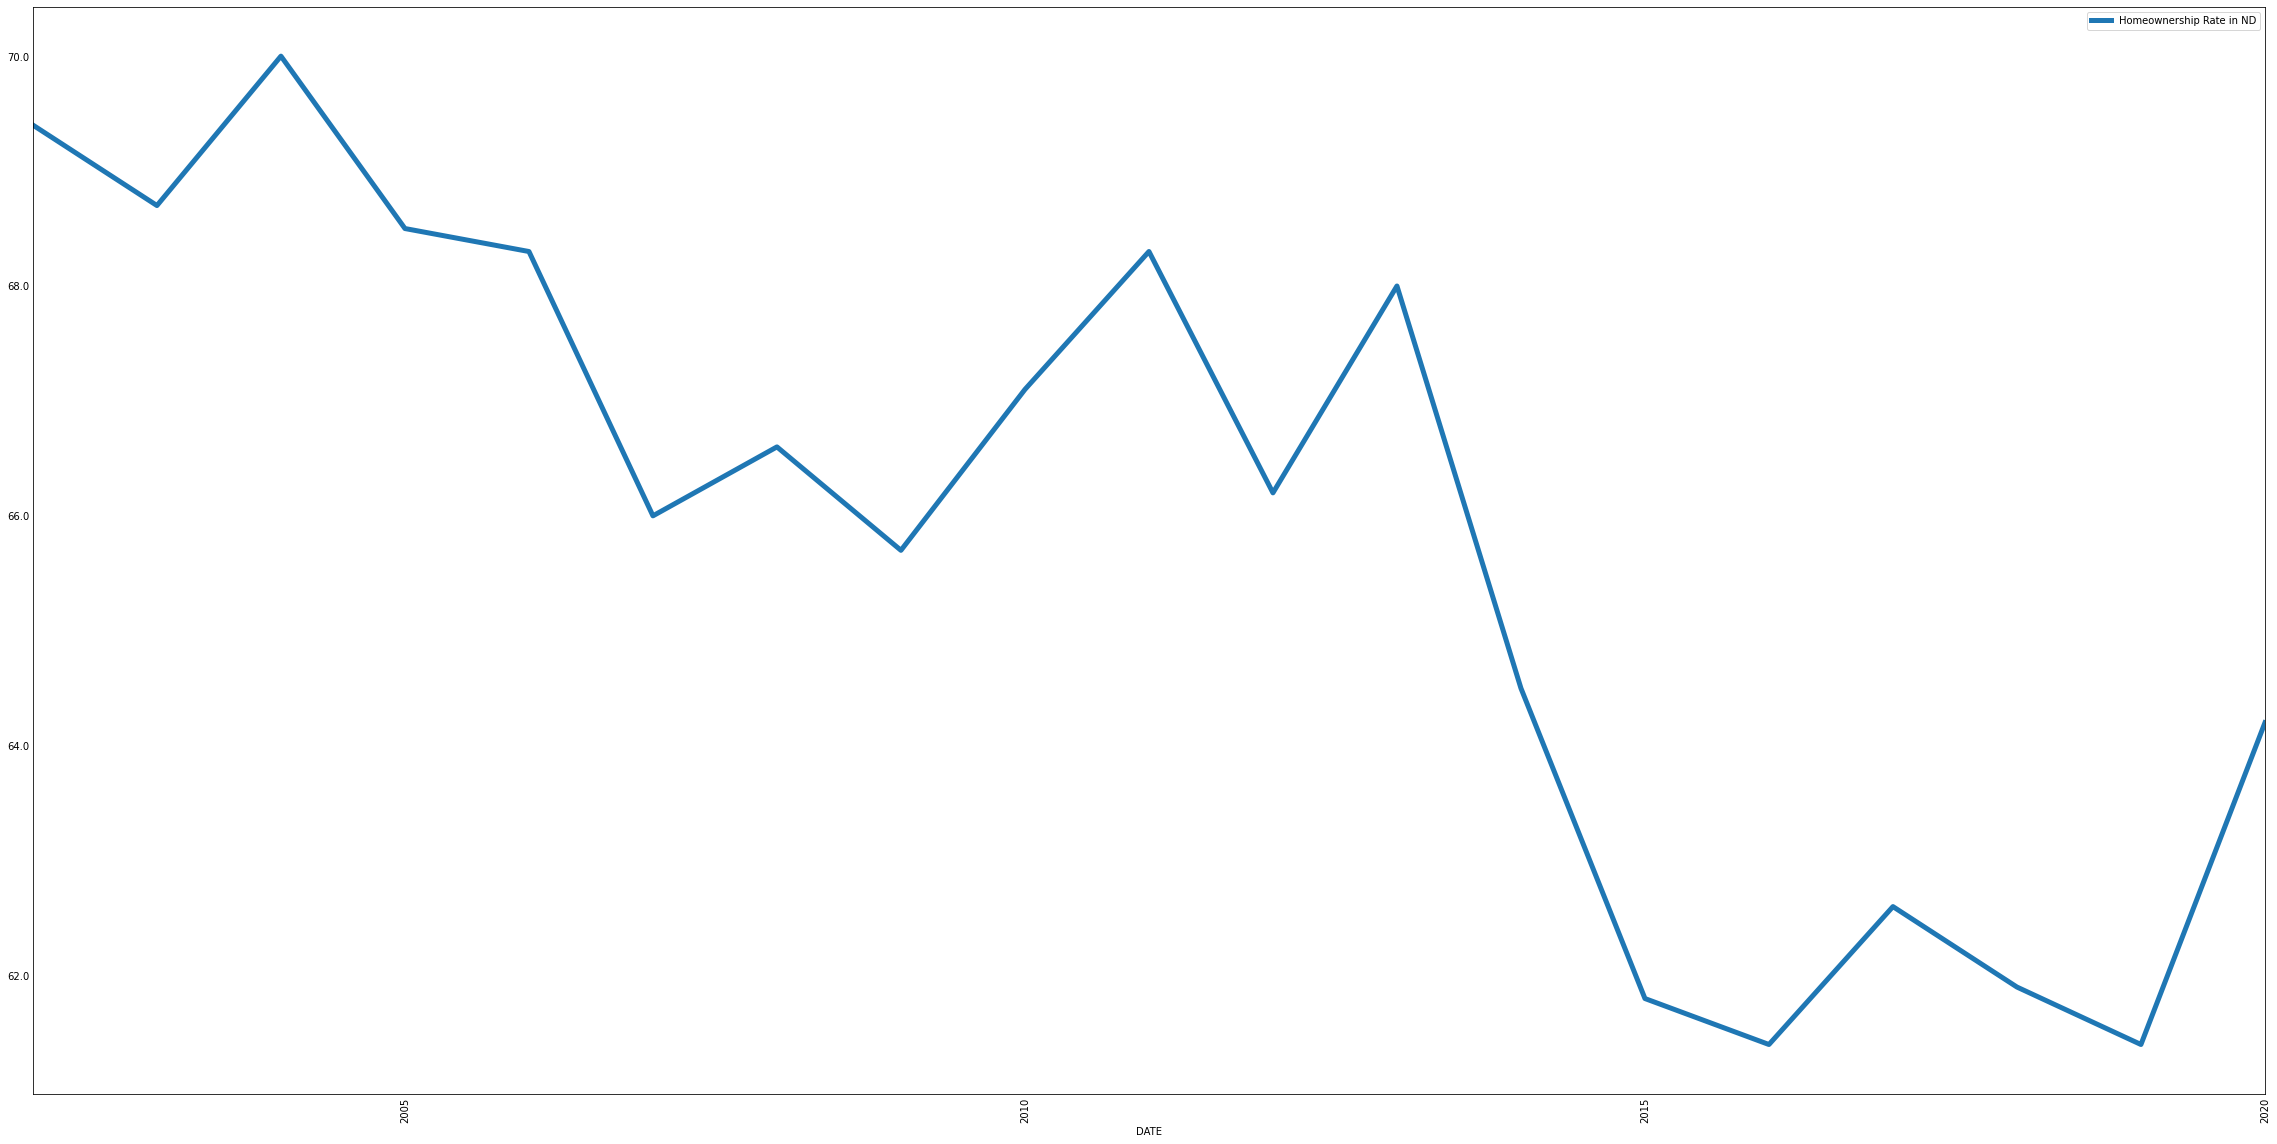

In [4]:
data1 = ["Homeownership Rate in ND"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

## B: Comparison between ND and U.S. Homeownership Rates

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


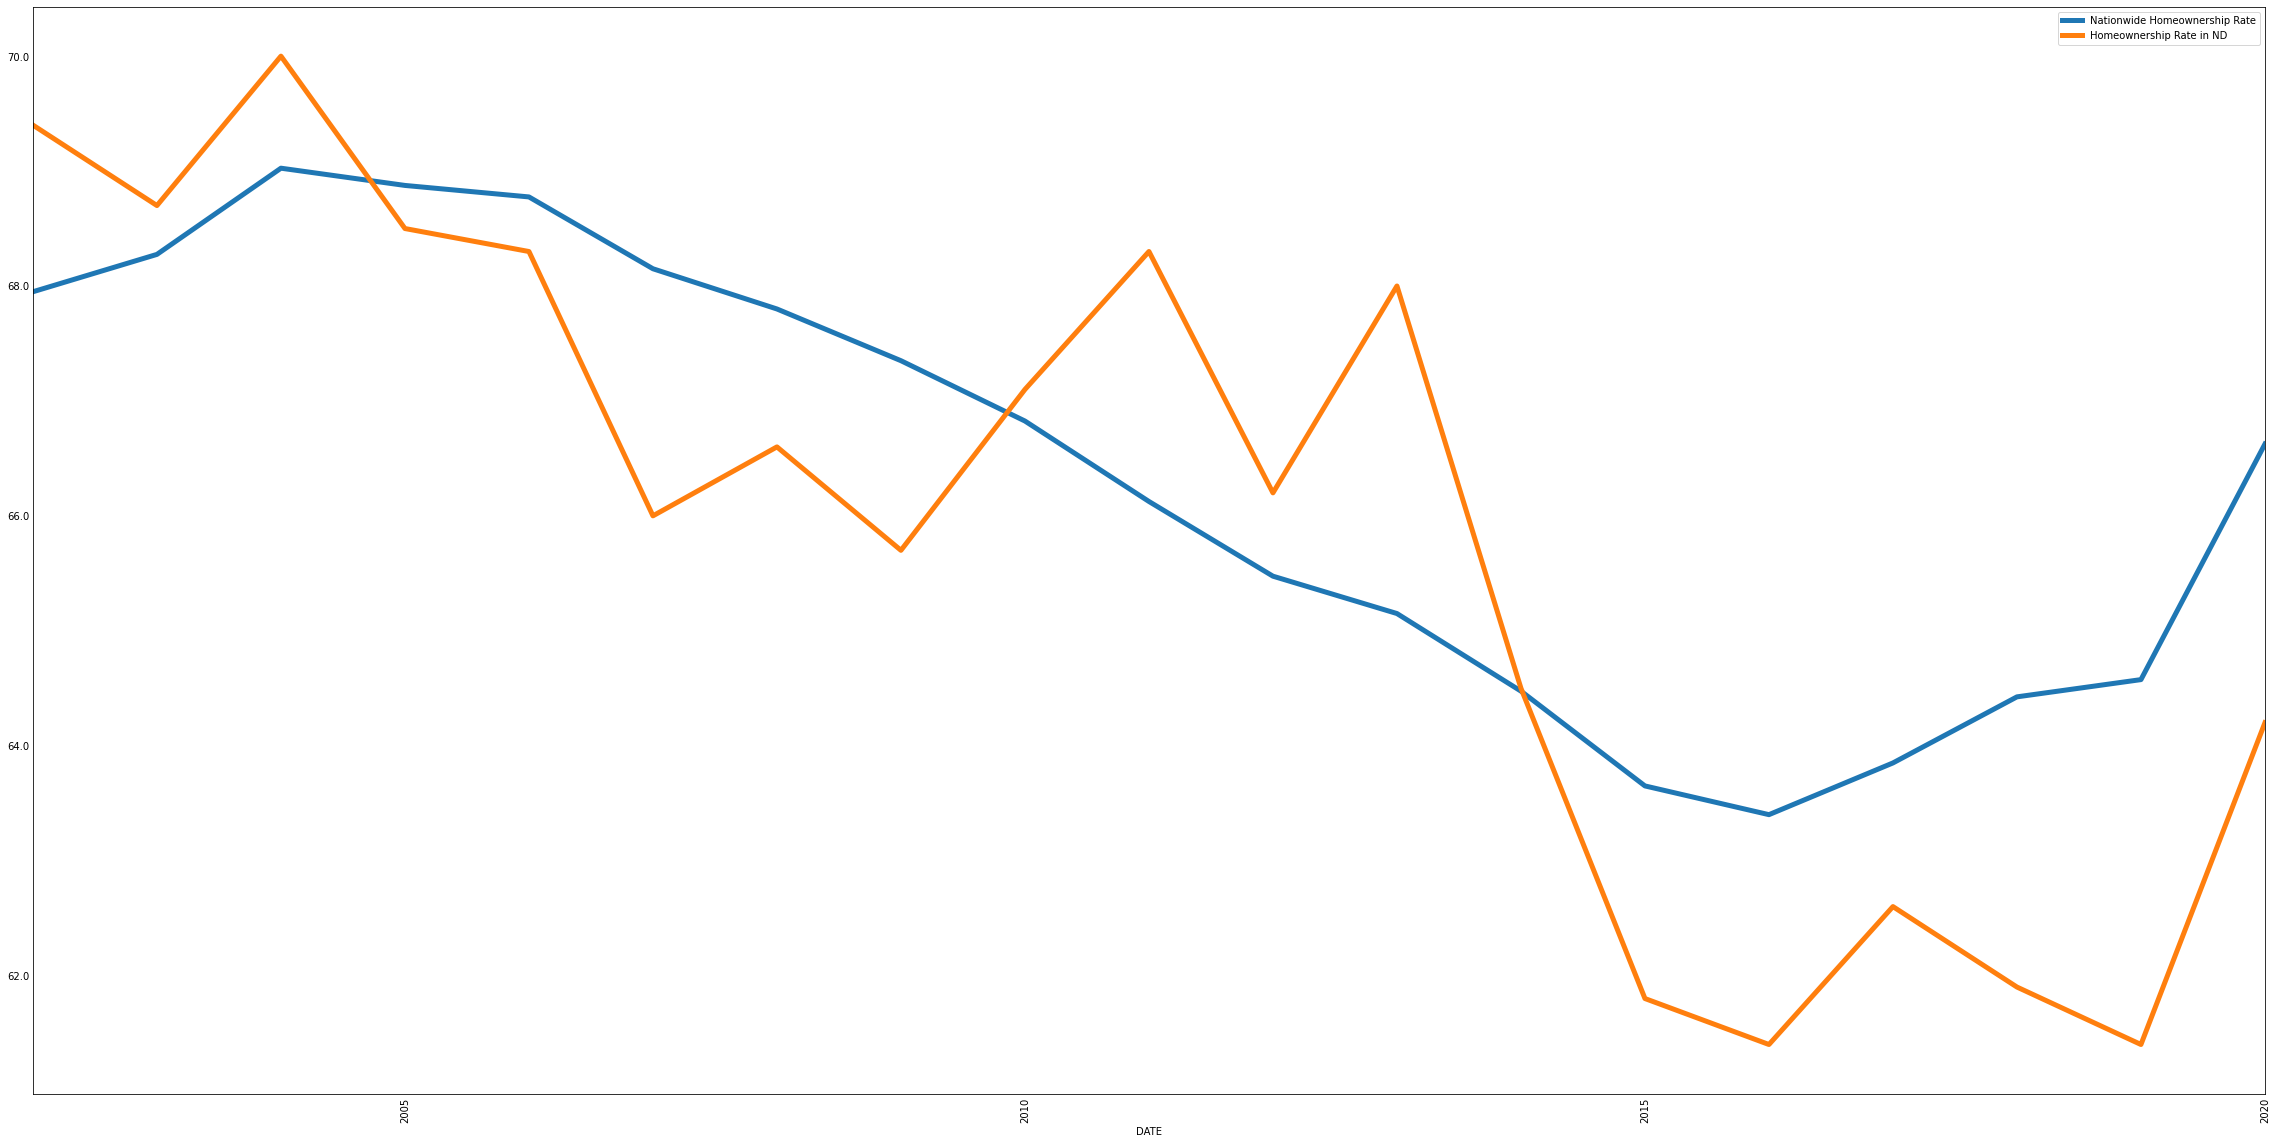

In [5]:
data1 = ["Nationwide Homeownership Rate", "Homeownership Rate in ND"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

# C: Difference between ND and U.S. Homeownership Rates

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


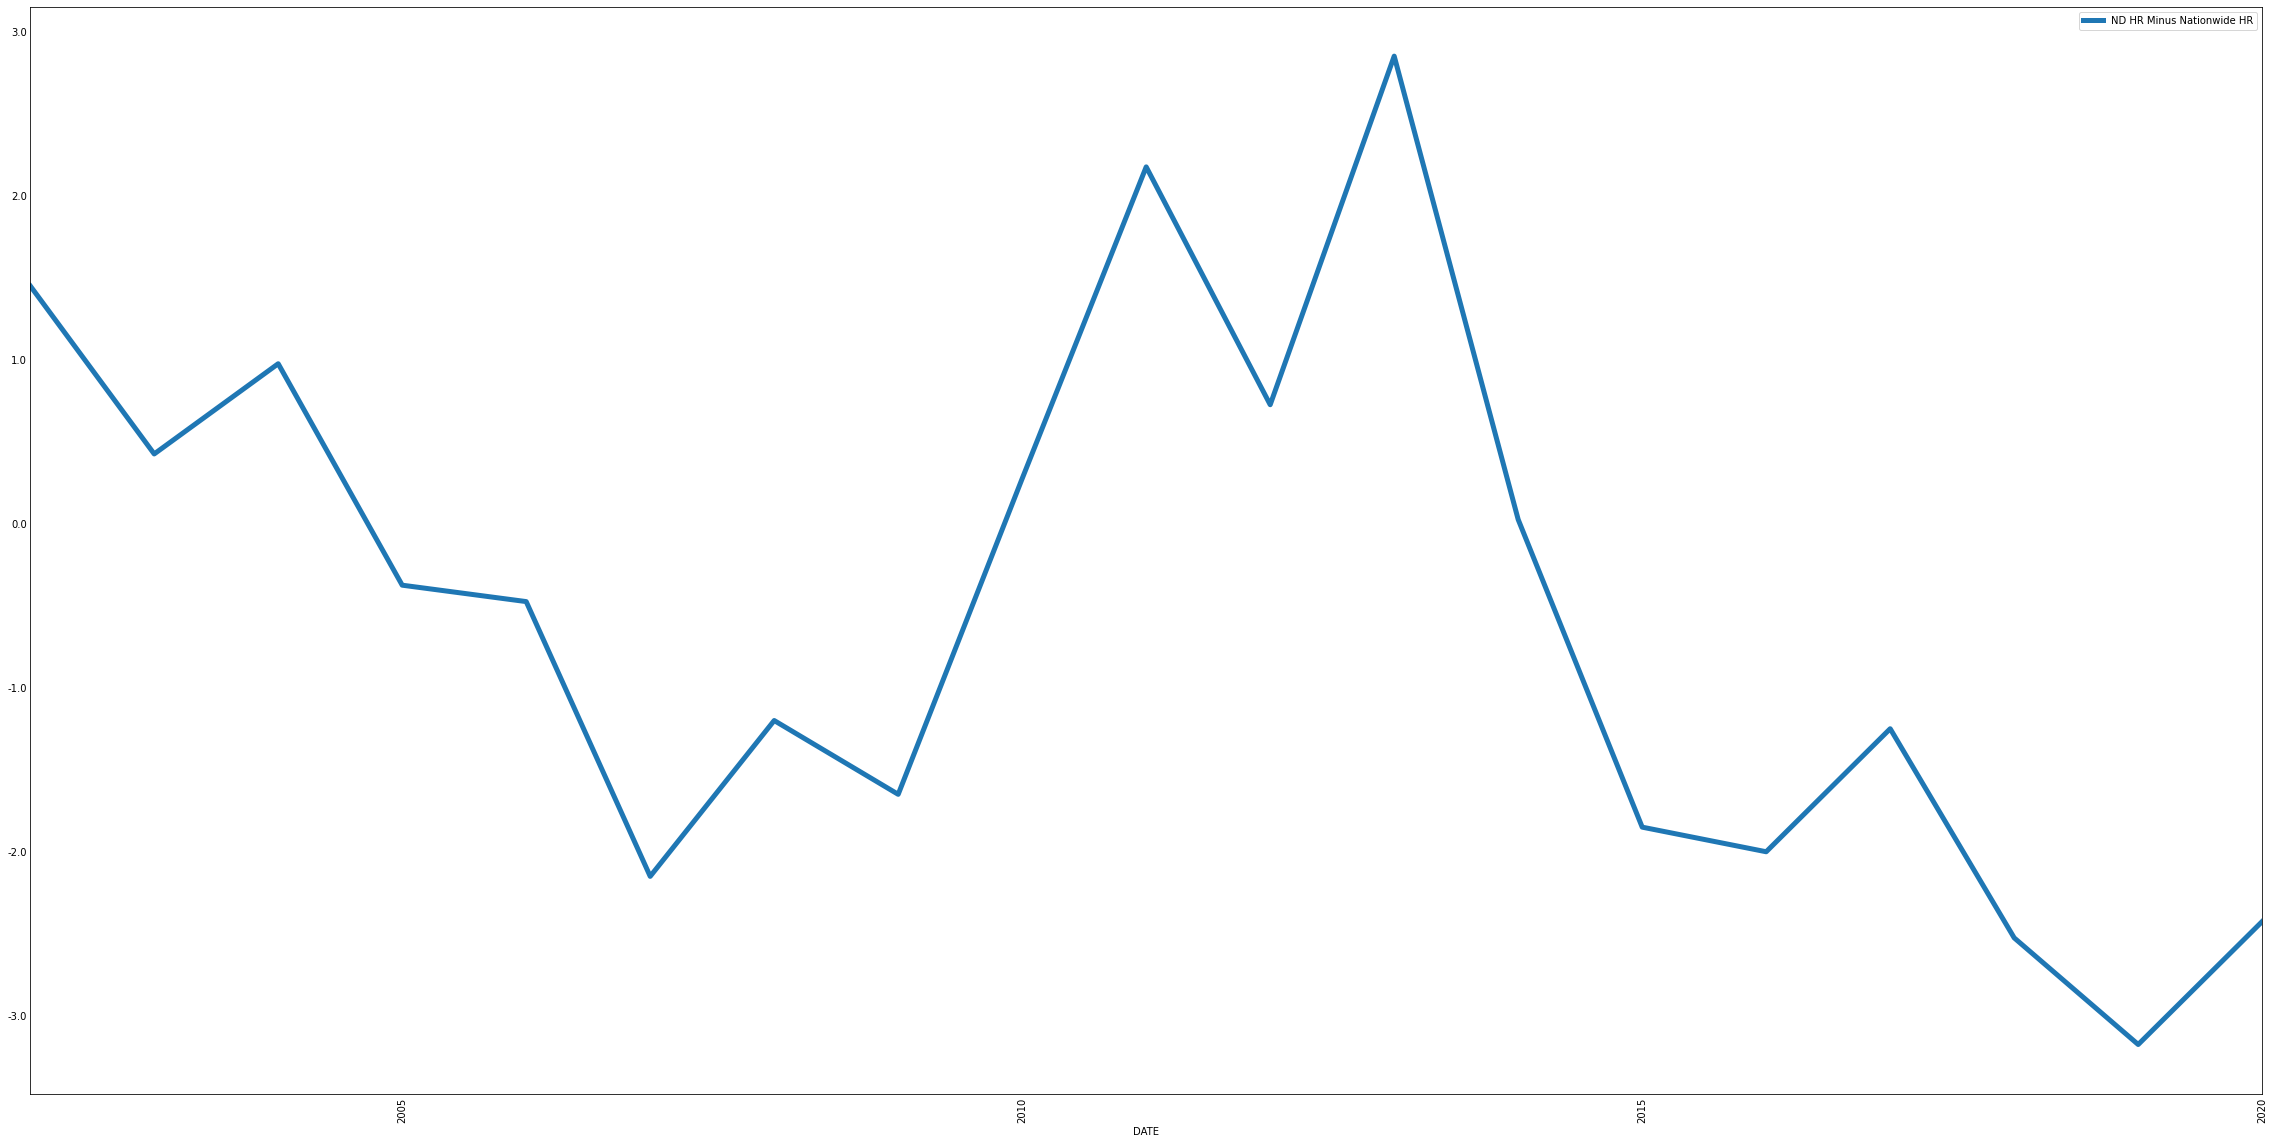

In [6]:
data["ND HR Minus Nationwide HR"] = data["Homeownership Rate in ND"] - data["Nationwide Homeownership Rate"]
data1 = ["ND HR Minus Nationwide HR"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

In [7]:
data["Per Capita Income (Differenced)"] = data["ND Per Capita Income"].diff()

# D: ND Per Capita Income

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


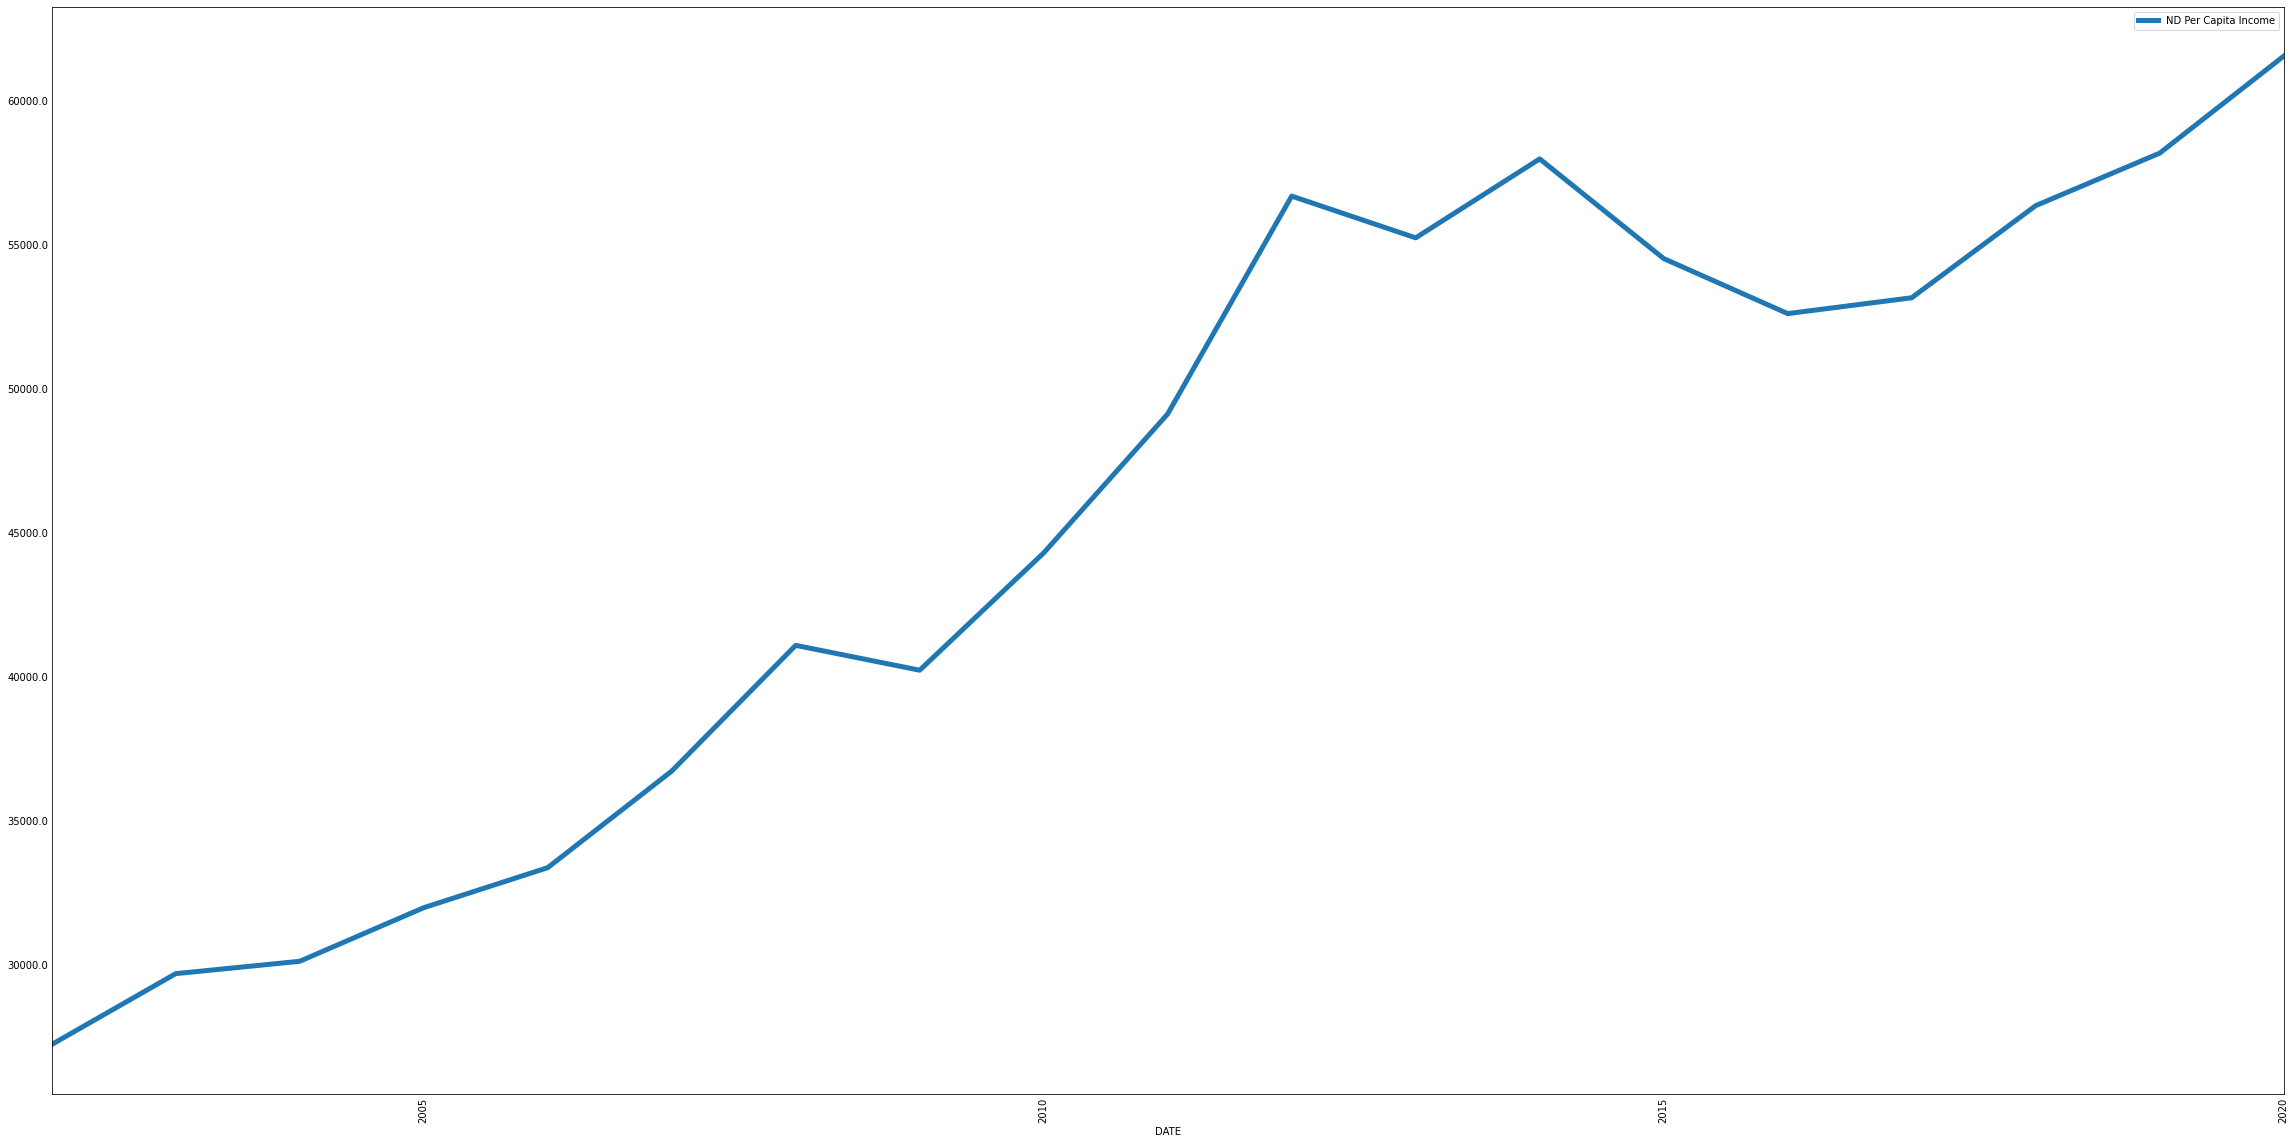

In [8]:
data1 = ["ND Per Capita Income"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

# E: Per Capita Income (First Difference)

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


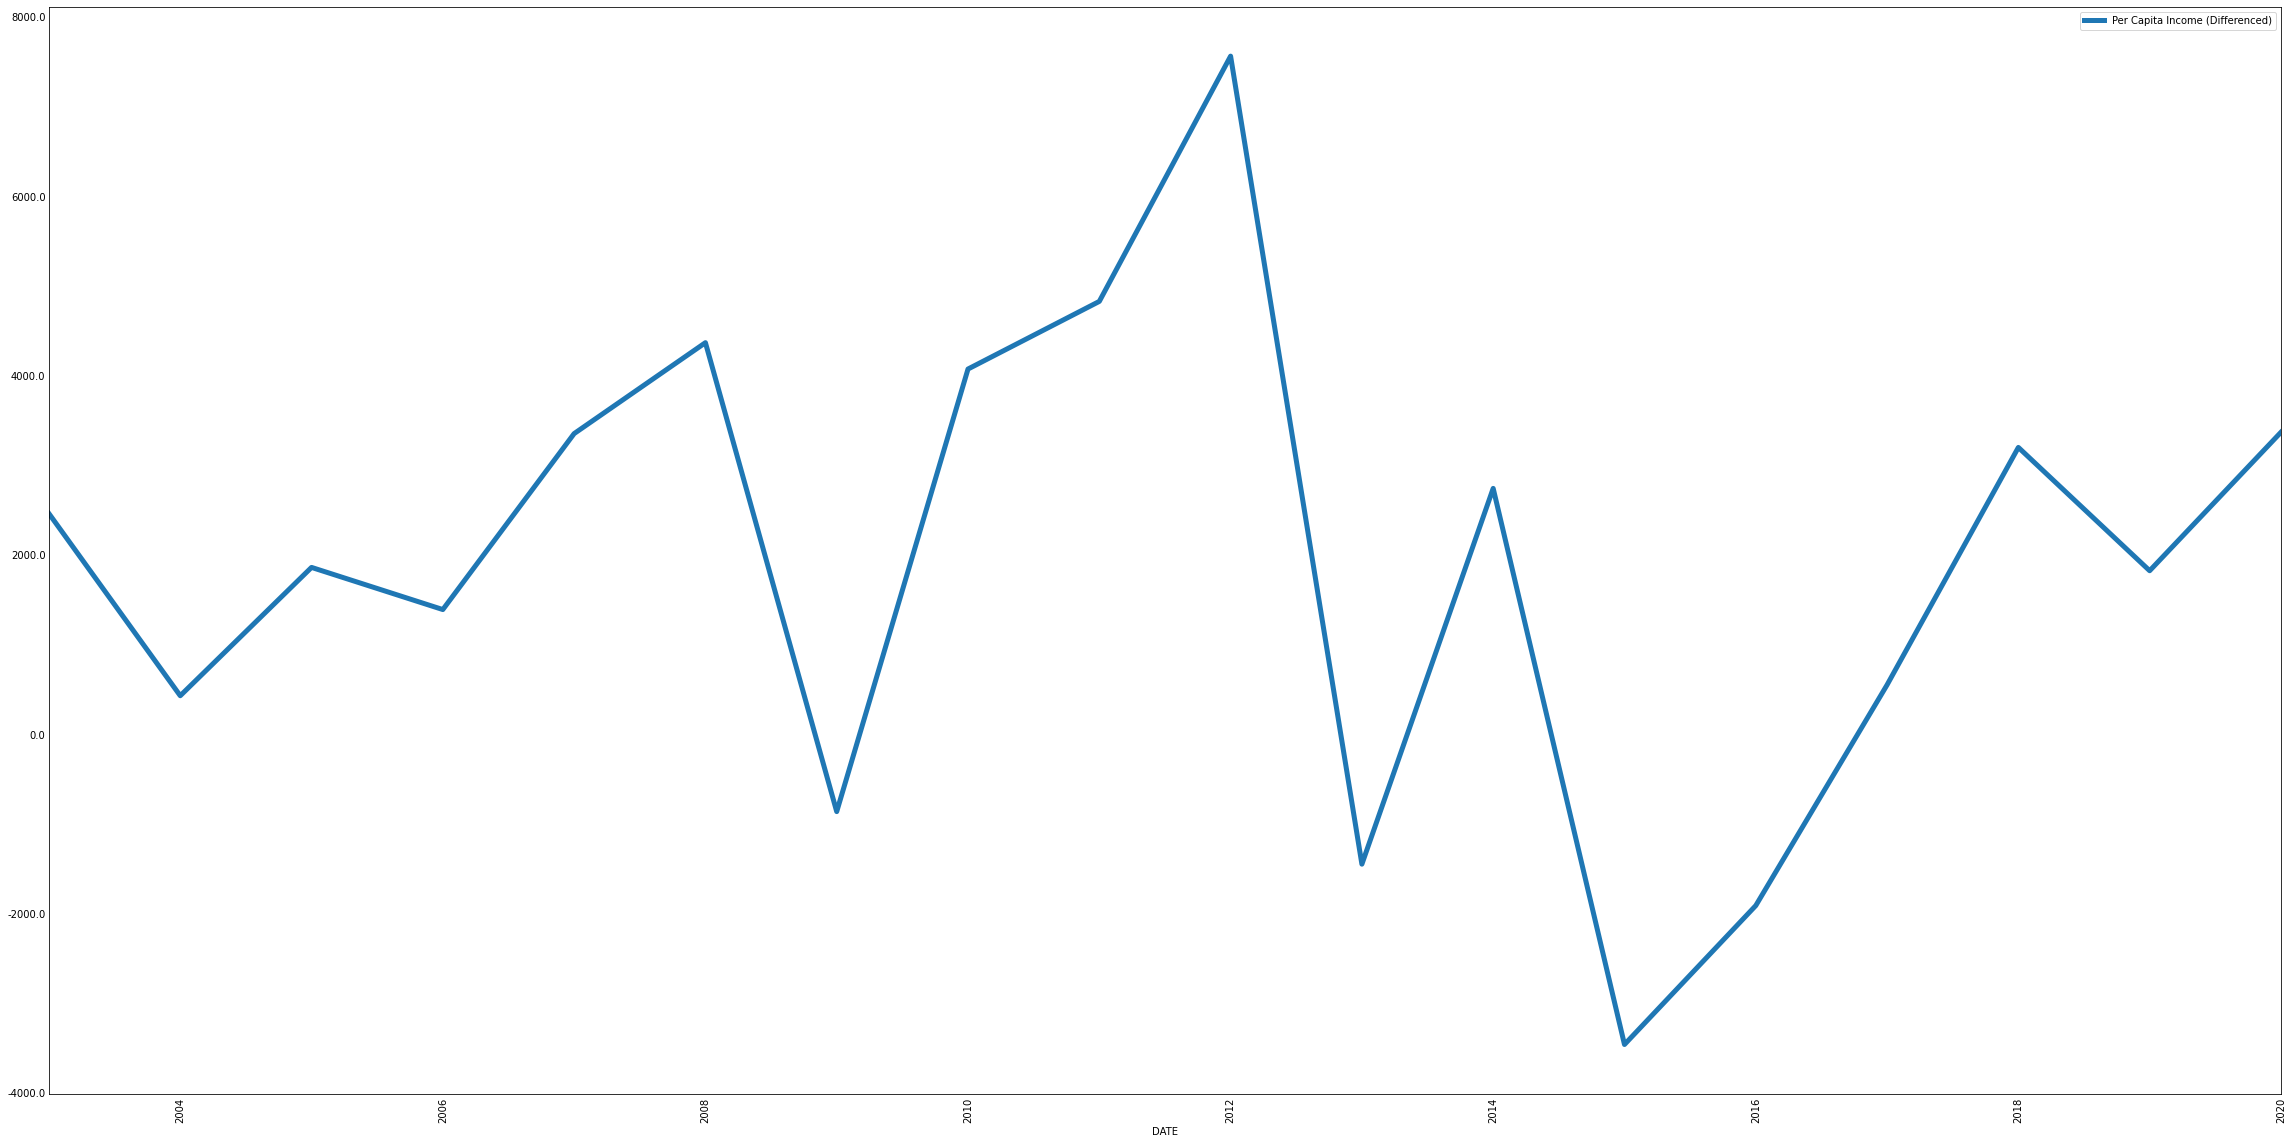

In [9]:
data1 = ["Per Capita Income (Differenced)"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

# F: Unemployment Rate

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


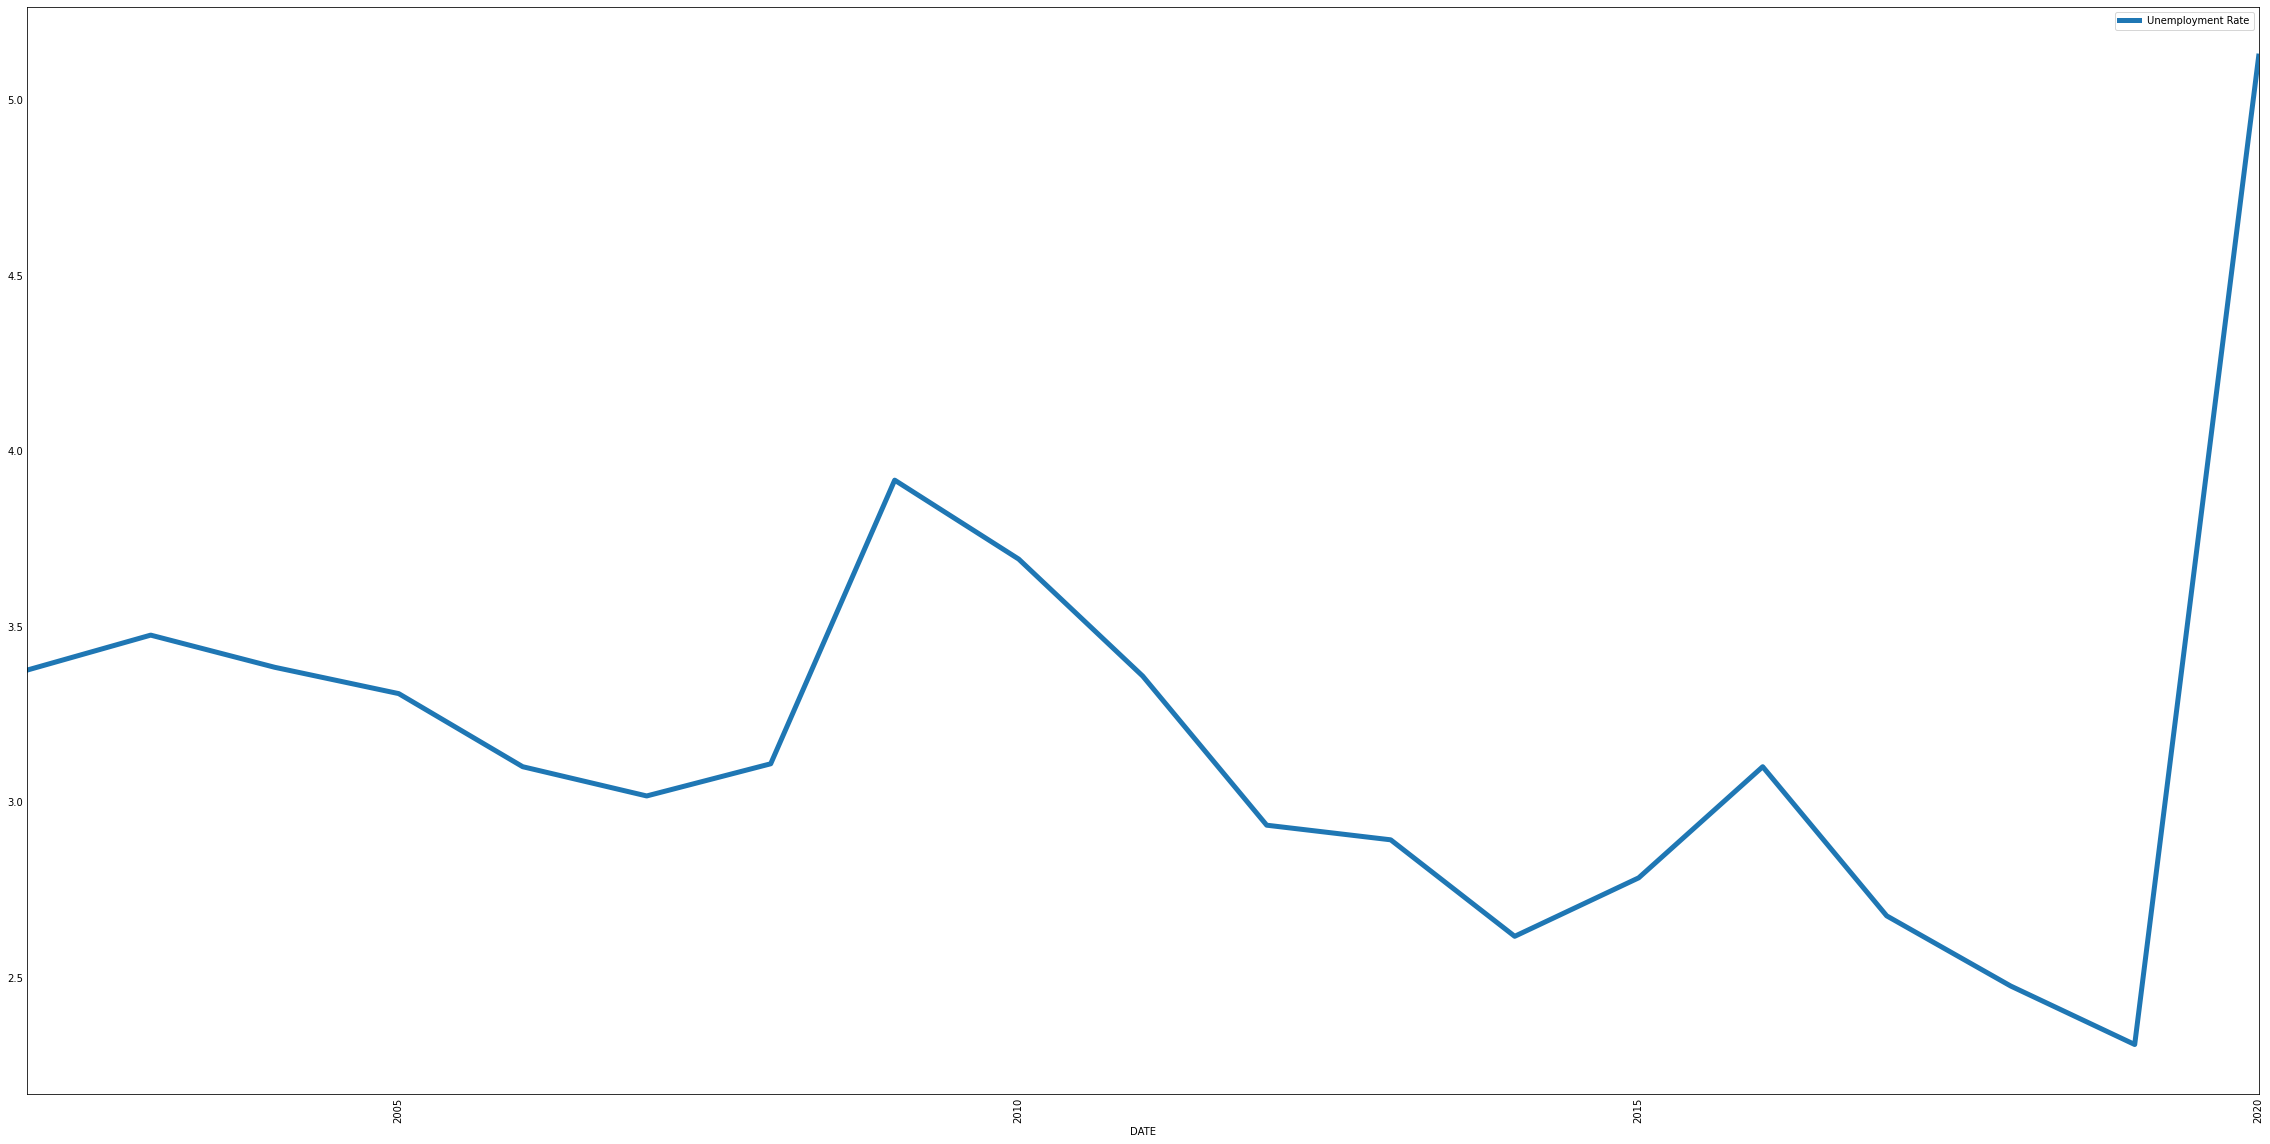

In [10]:
data1 = ["Unemployment Rate"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

# G: ND Population

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


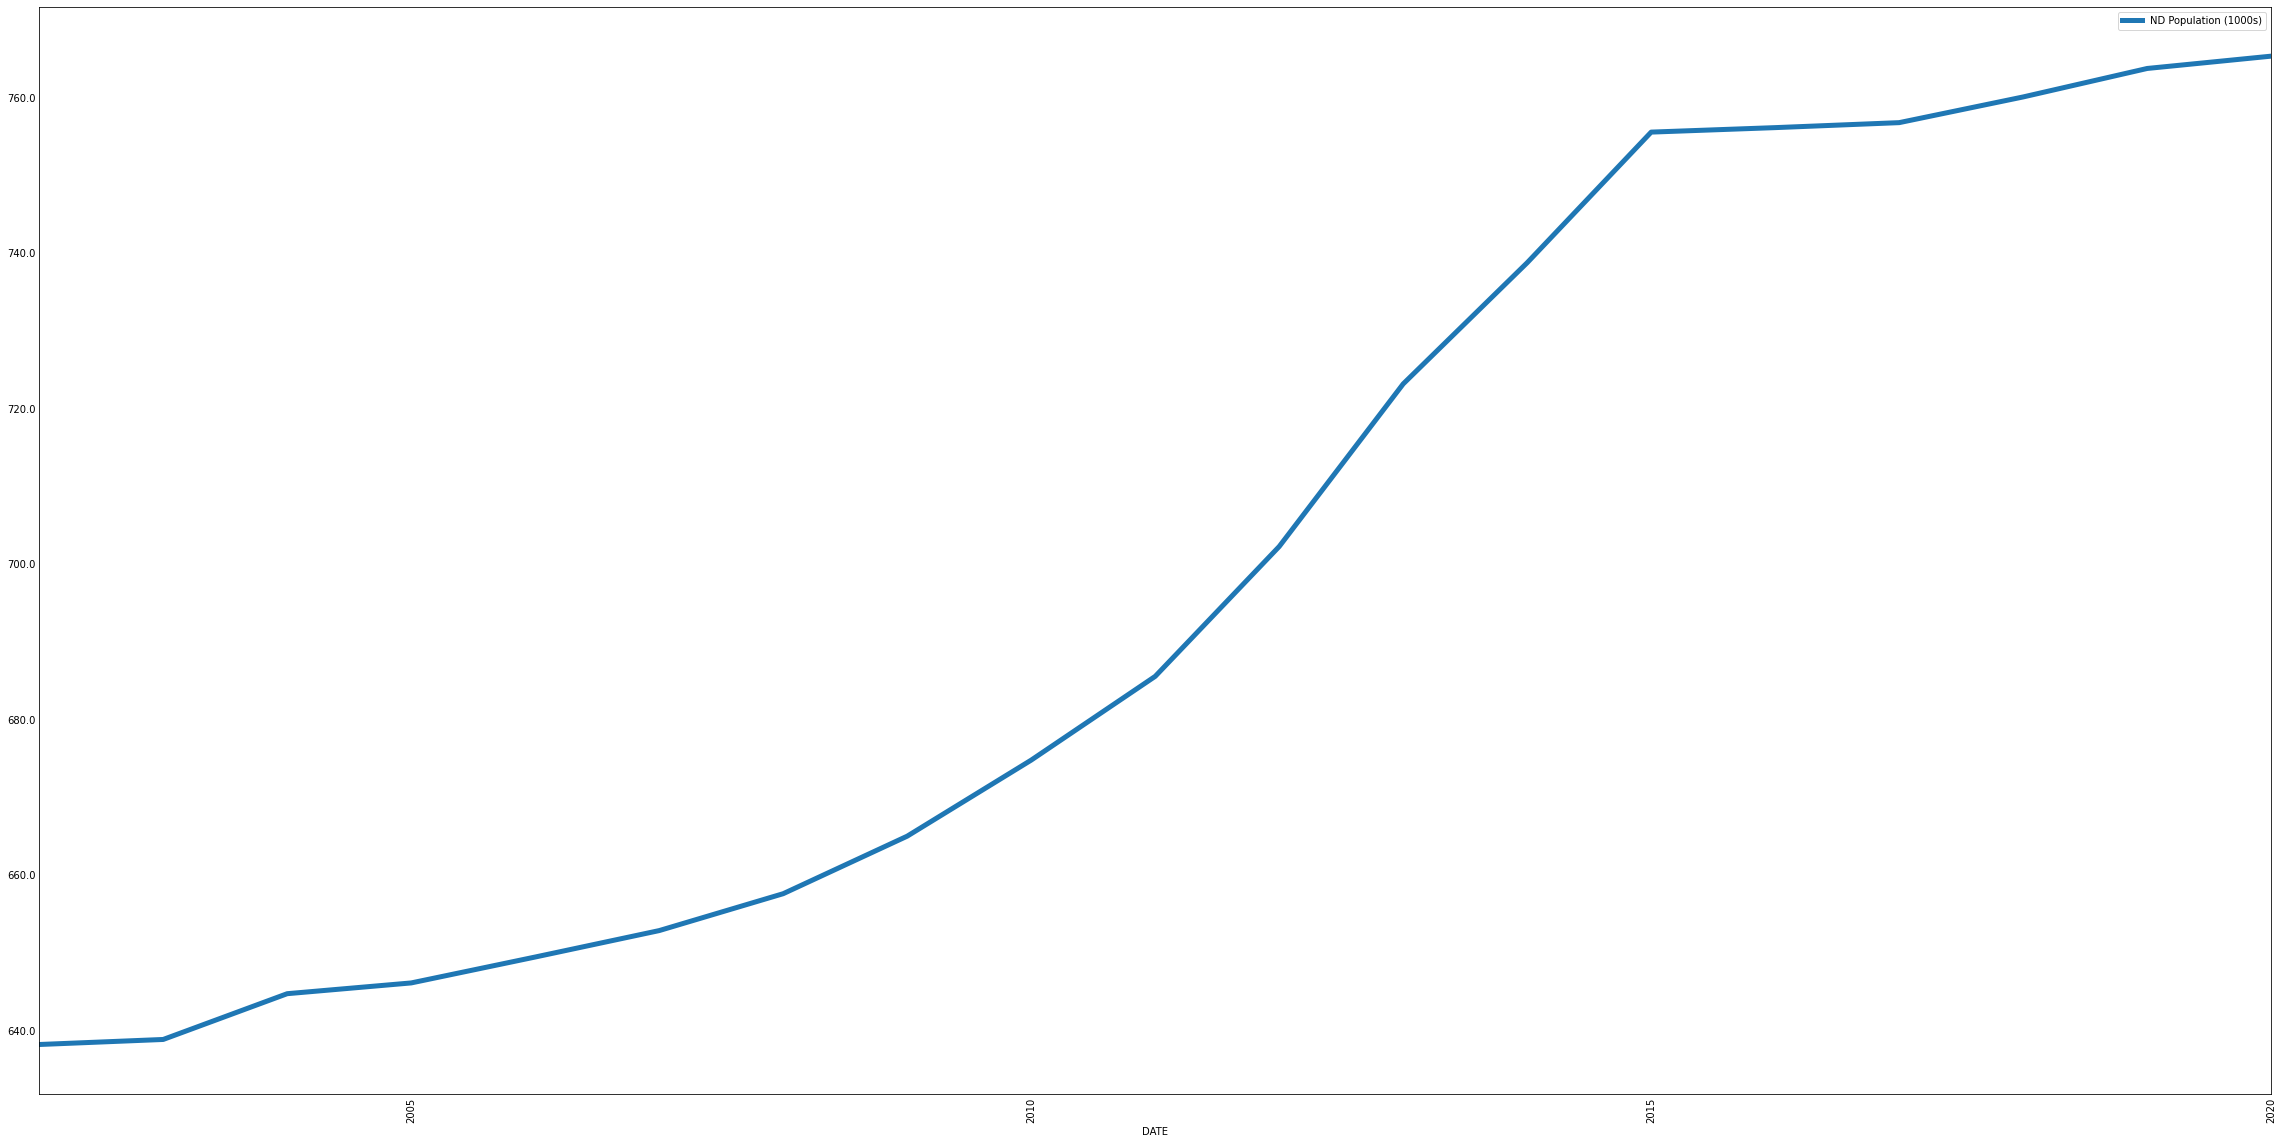

In [11]:
data1 = ["ND Population (1000s)"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

In [12]:
data["ND Population/US Population"] = data["ND Population (1000s)"]/data["US Population (1000s)"]

# H: ND Population as a Percentage of U.S. Population

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


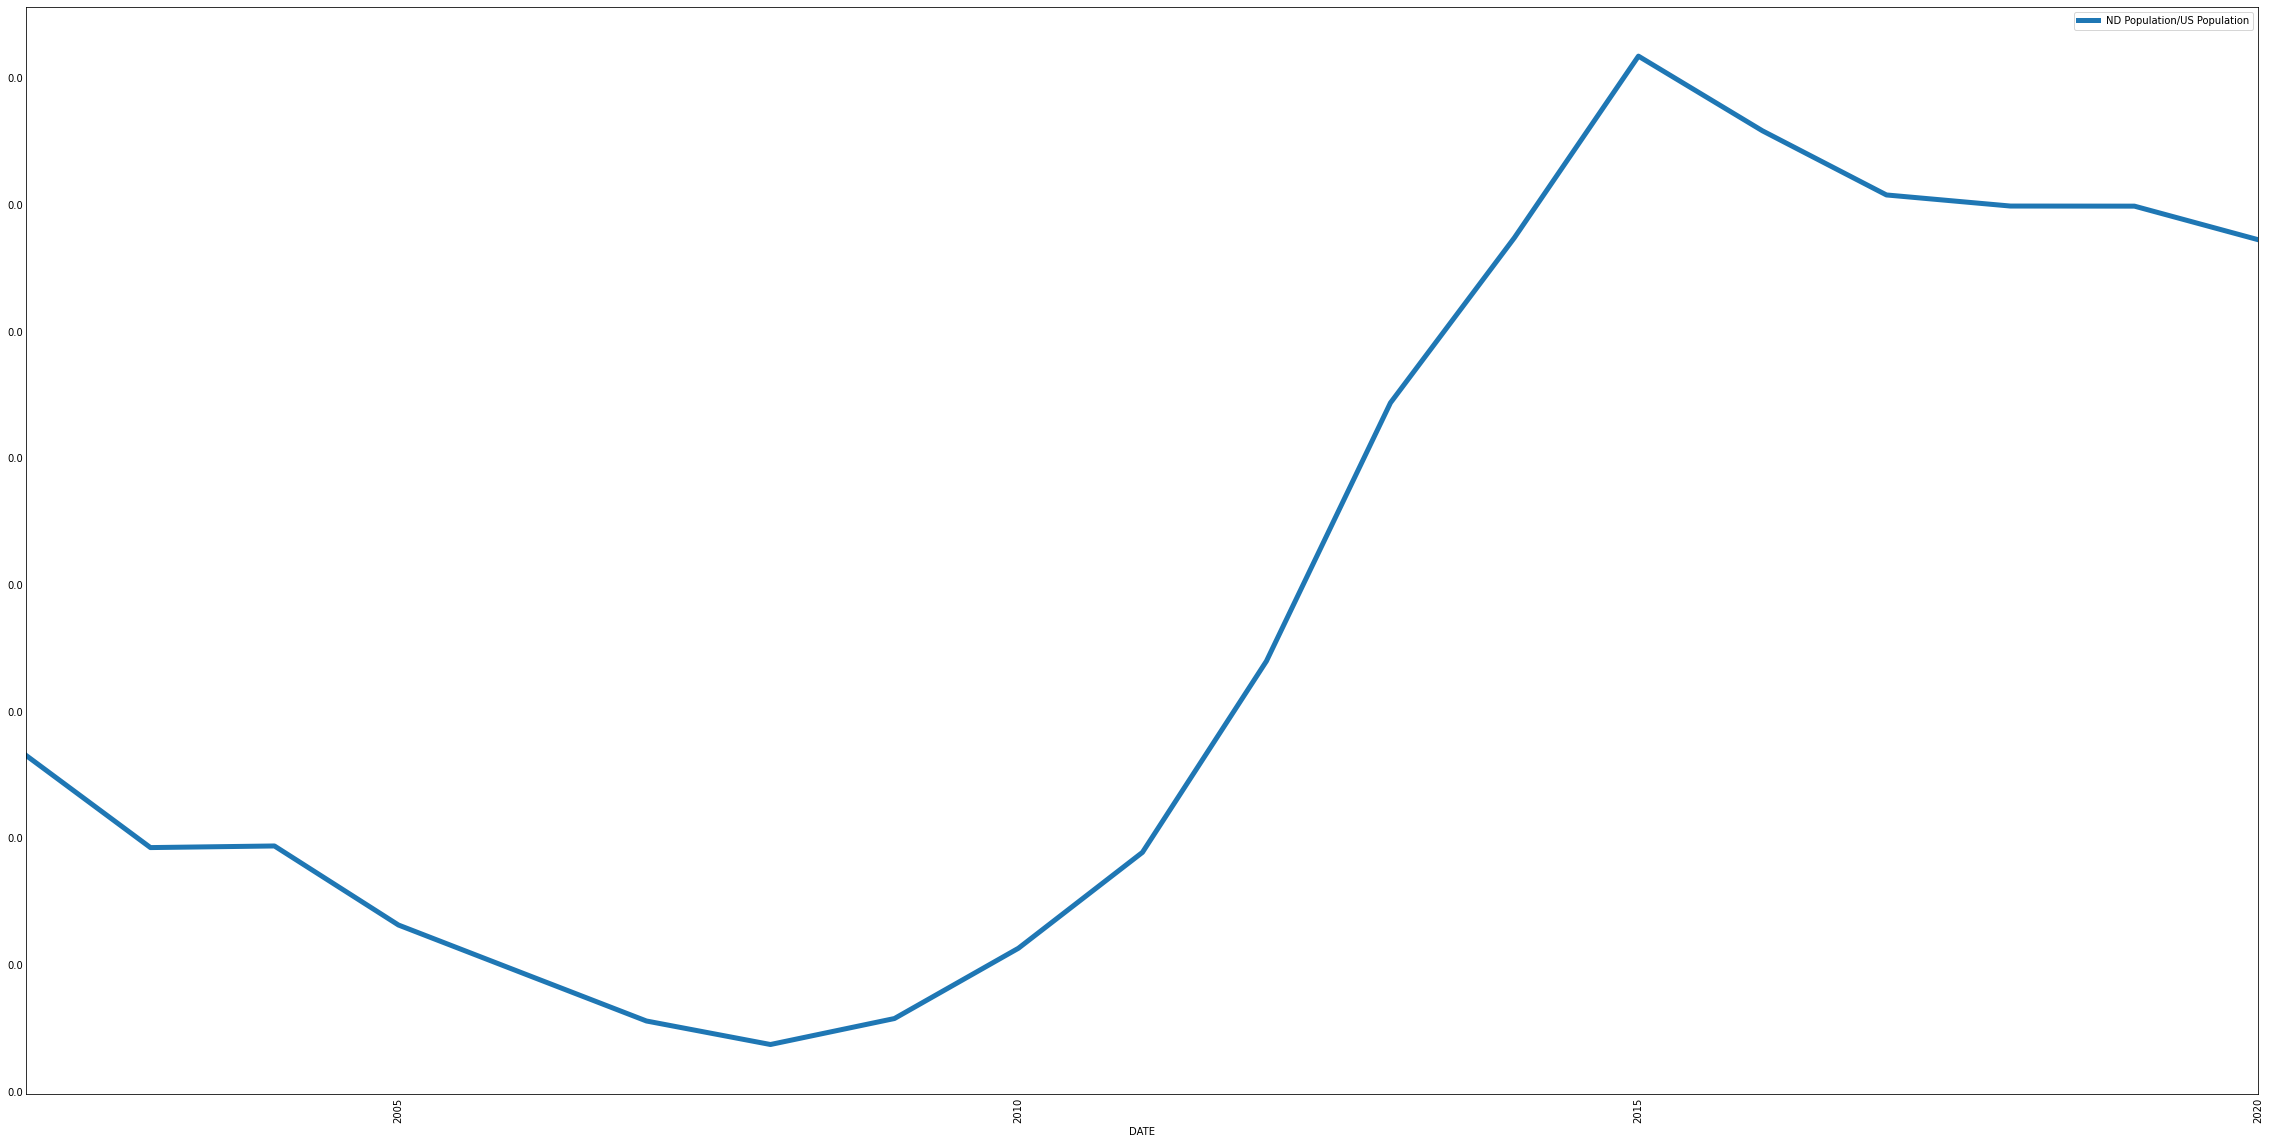

In [13]:
data1 = ["ND Population/US Population"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

# I: OLS Model

In [14]:
import statsmodels.api as sm
y_var = ["Homeownership Rate in ND"]
x_vars = ["ND Population (1000s)"]
reg_vars = y_var + x_vars
reg_data = data[reg_vars]
reg_data.corr().round(2)

,Homeownership Rate in ND,ND Population (1000s)
Homeownership Rate in ND,1.00,-0.87
ND Population (1000s),-0.87,1.00


In [15]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

In [16]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

<ipython-input-16-a770ddb4f4be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data[y_var[0] + " Predictor"] = predictor


,Homeownership Rate in ND,ND Population (1000s),Homeownership Rate in ND Predictor
DATE,,,
2002-12-31,69.4,638.168,68.847752
2003-12-31,68.7,638.817,68.815277
2004-12-31,70.0,644.705,68.520650
2005-12-31,68.5,646.089,68.451397
2006-12-31,68.3,649.422,68.284618
2007-12-31,66.0,652.822,68.114487
2008-12-31,66.6,657.569,67.876954
2009-12-31,65.7,664.968,67.506718
2010-12-31,67.1,674.752,67.017141


In [17]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]
reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean) ** 2
reg_data["Squared Residuals"] = (y.sub(y_hat)) ** 2
reg_data["Squared Totals"] = (y.sub(y_mean)) ** 2
reg_data

<ipython-input-17-c08bbd5c6149>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = (y.sub(y_hat))
<ipython-input-17-c08bbd5c6149>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Squared Explained"] = y_hat.sub(y_mean) ** 2
<ipython-input-17-c08bbd5c6149>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,Homeownership Rate in ND,ND Population (1000s),Homeownership Rate in ND Predictor,Residuals,Squared Explained,Squared Residuals,Squared Totals
DATE,,,,,,,
2002-12-31,69.4,638.168,68.847752,0.552248,9.160912,0.304977,12.808864
2003-12-31,68.7,638.817,68.815277,-0.115277,8.965382,0.013289,8.288338
2004-12-31,70.0,644.705,68.520650,1.479350,7.287827,2.188476,17.463601
2005-12-31,68.5,646.089,68.451397,0.048603,6.918710,0.002362,7.176759
2006-12-31,68.3,649.422,68.284618,0.015382,6.069155,0.000237,6.145180
2007-12-31,66.0,652.822,68.114487,-2.114487,5.259841,4.471055,0.032022
2008-12-31,66.6,657.569,67.876954,-1.276954,4.226730,1.630611,0.606759
2009-12-31,65.7,664.968,67.506718,-1.806718,2.841469,3.264231,0.014654
2010-12-31,67.1,674.752,67.017141,0.082859,1.430627,0.006866,1.635706


In [18]:
SSR = reg_data["Squared Explained"].sum()
SSE = reg_data["Squared Residuals"].sum()
SST = reg_data["Squared Totals"].sum()
SSR,SSE,SST

(114.1351095711687, 36.45646937619951, 150.59157894736848)

In [19]:
cov_matrix = results.cov_params()
cov_matrix

,ND Population (1000s),Constant
ND Population (1000s),0.000047,-0.032868
Constant,-0.032868,23.076598


In [20]:
parameters = {}
for x_var in x_vars:
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t-stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

,Beta,Standard Error,t-stats
ND Population (1000s),-0.050039,0.006859,-7.295361


# J: North Dakota GDP

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


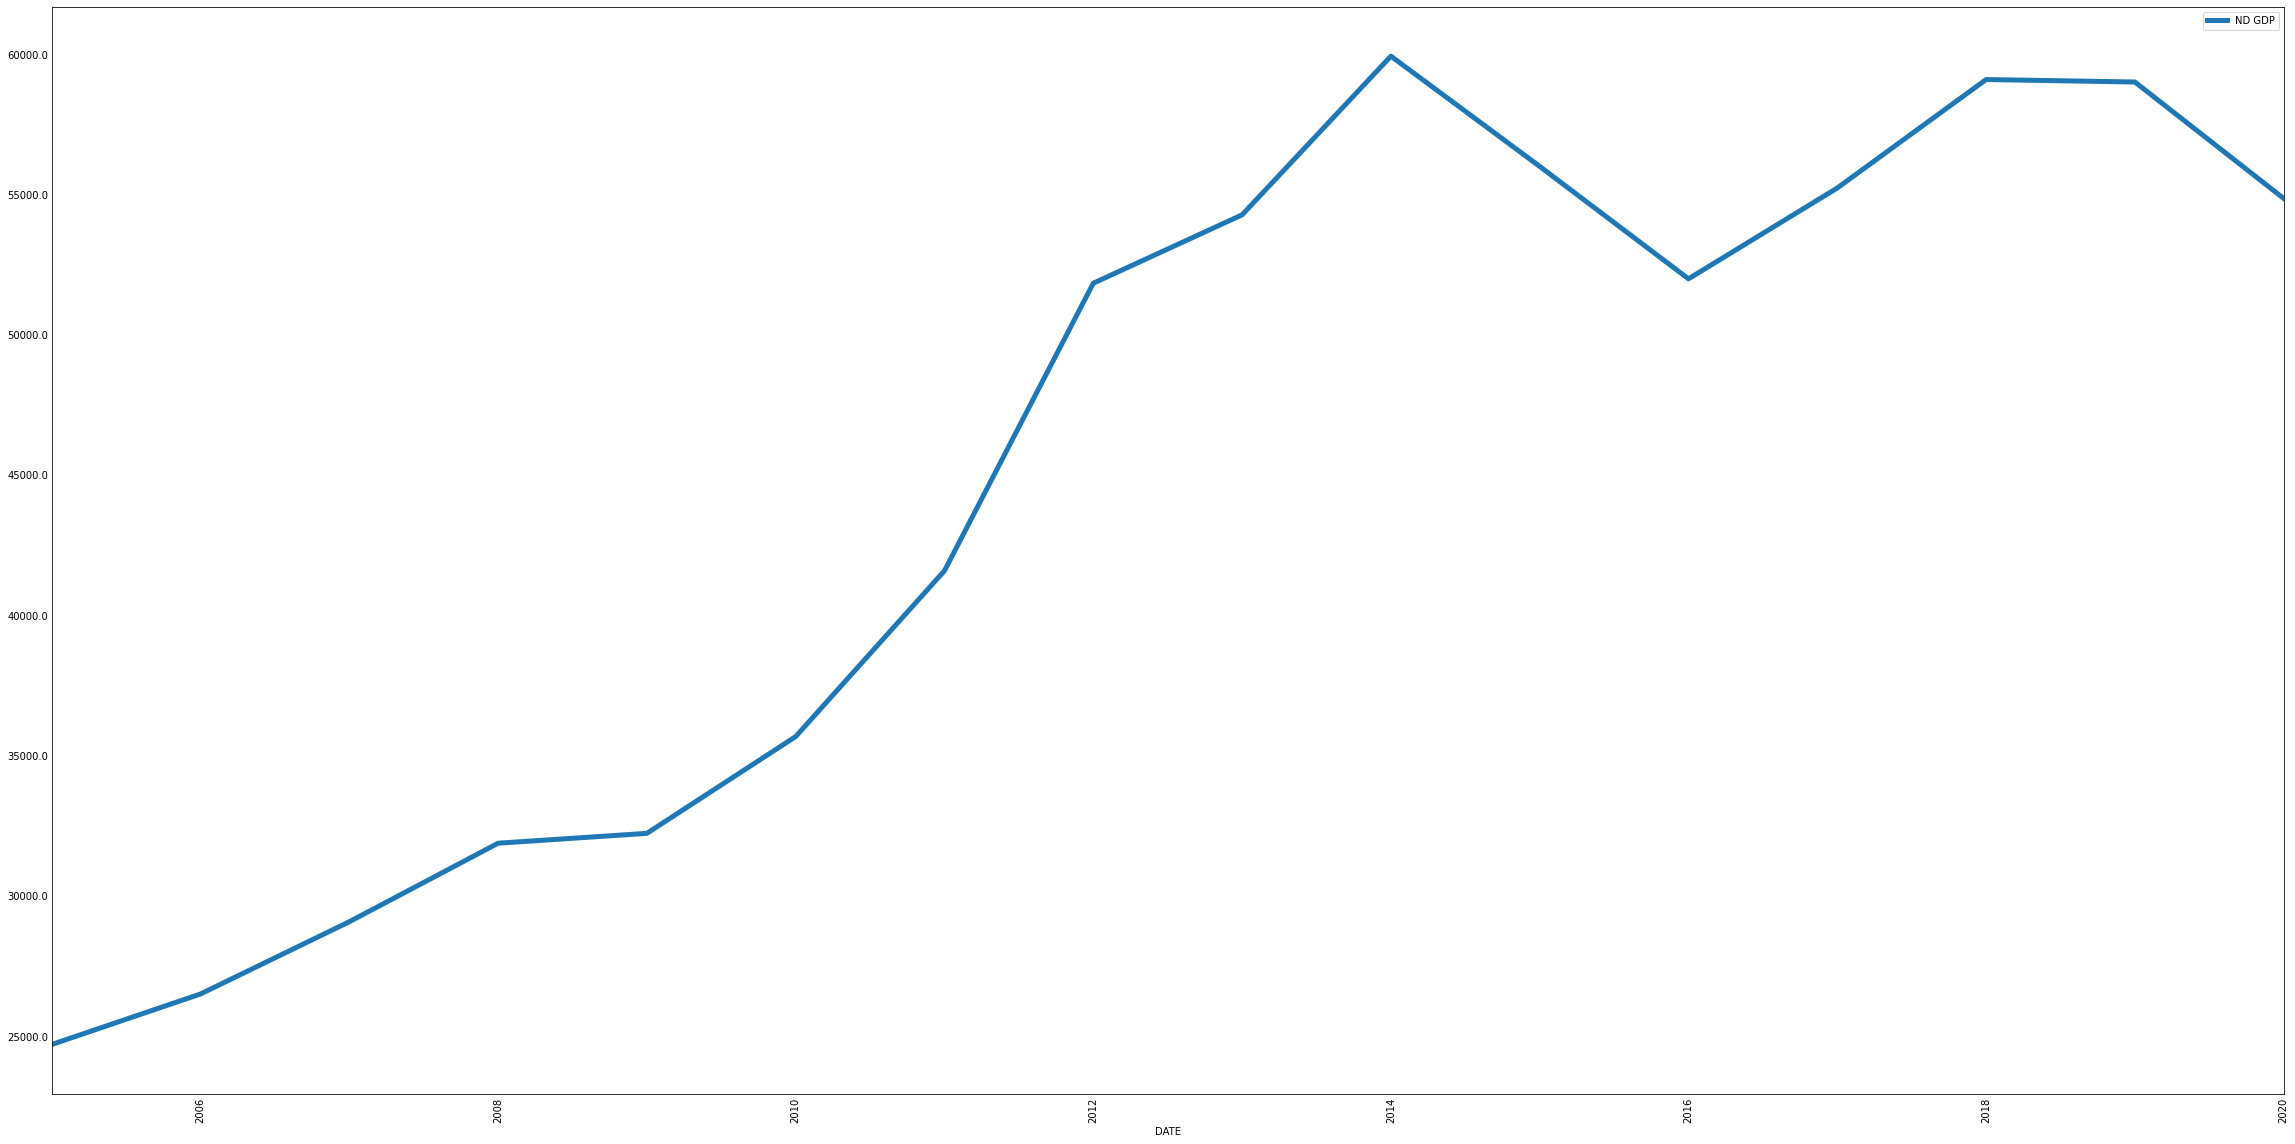

In [21]:
data1 = ["ND GDP"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

# K: Mortgage Rates

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


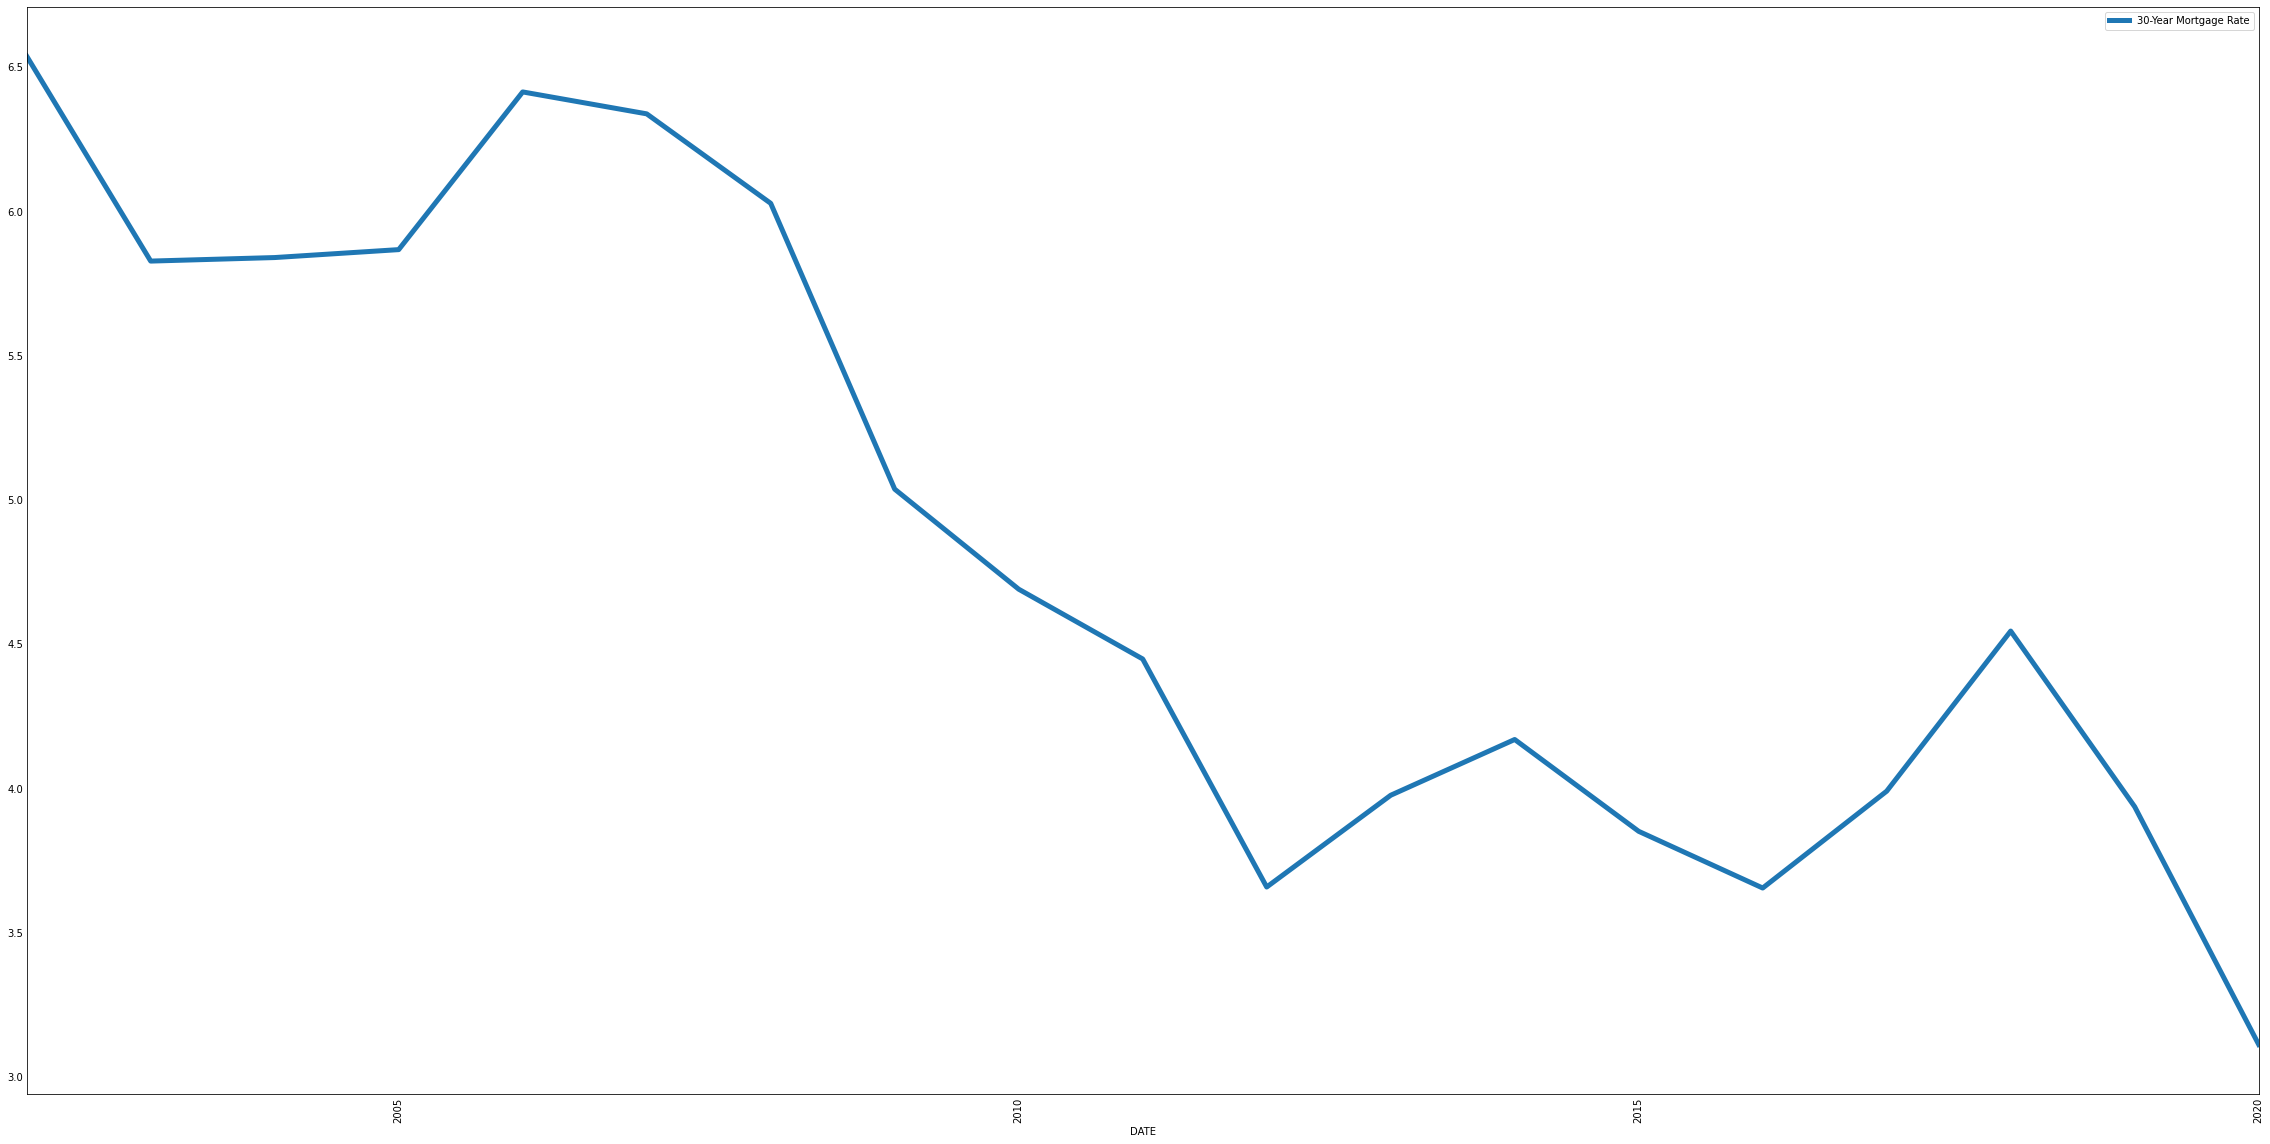

In [26]:
data1 = ["30-Year Mortgage Rate"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

# L: Housing Prices

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


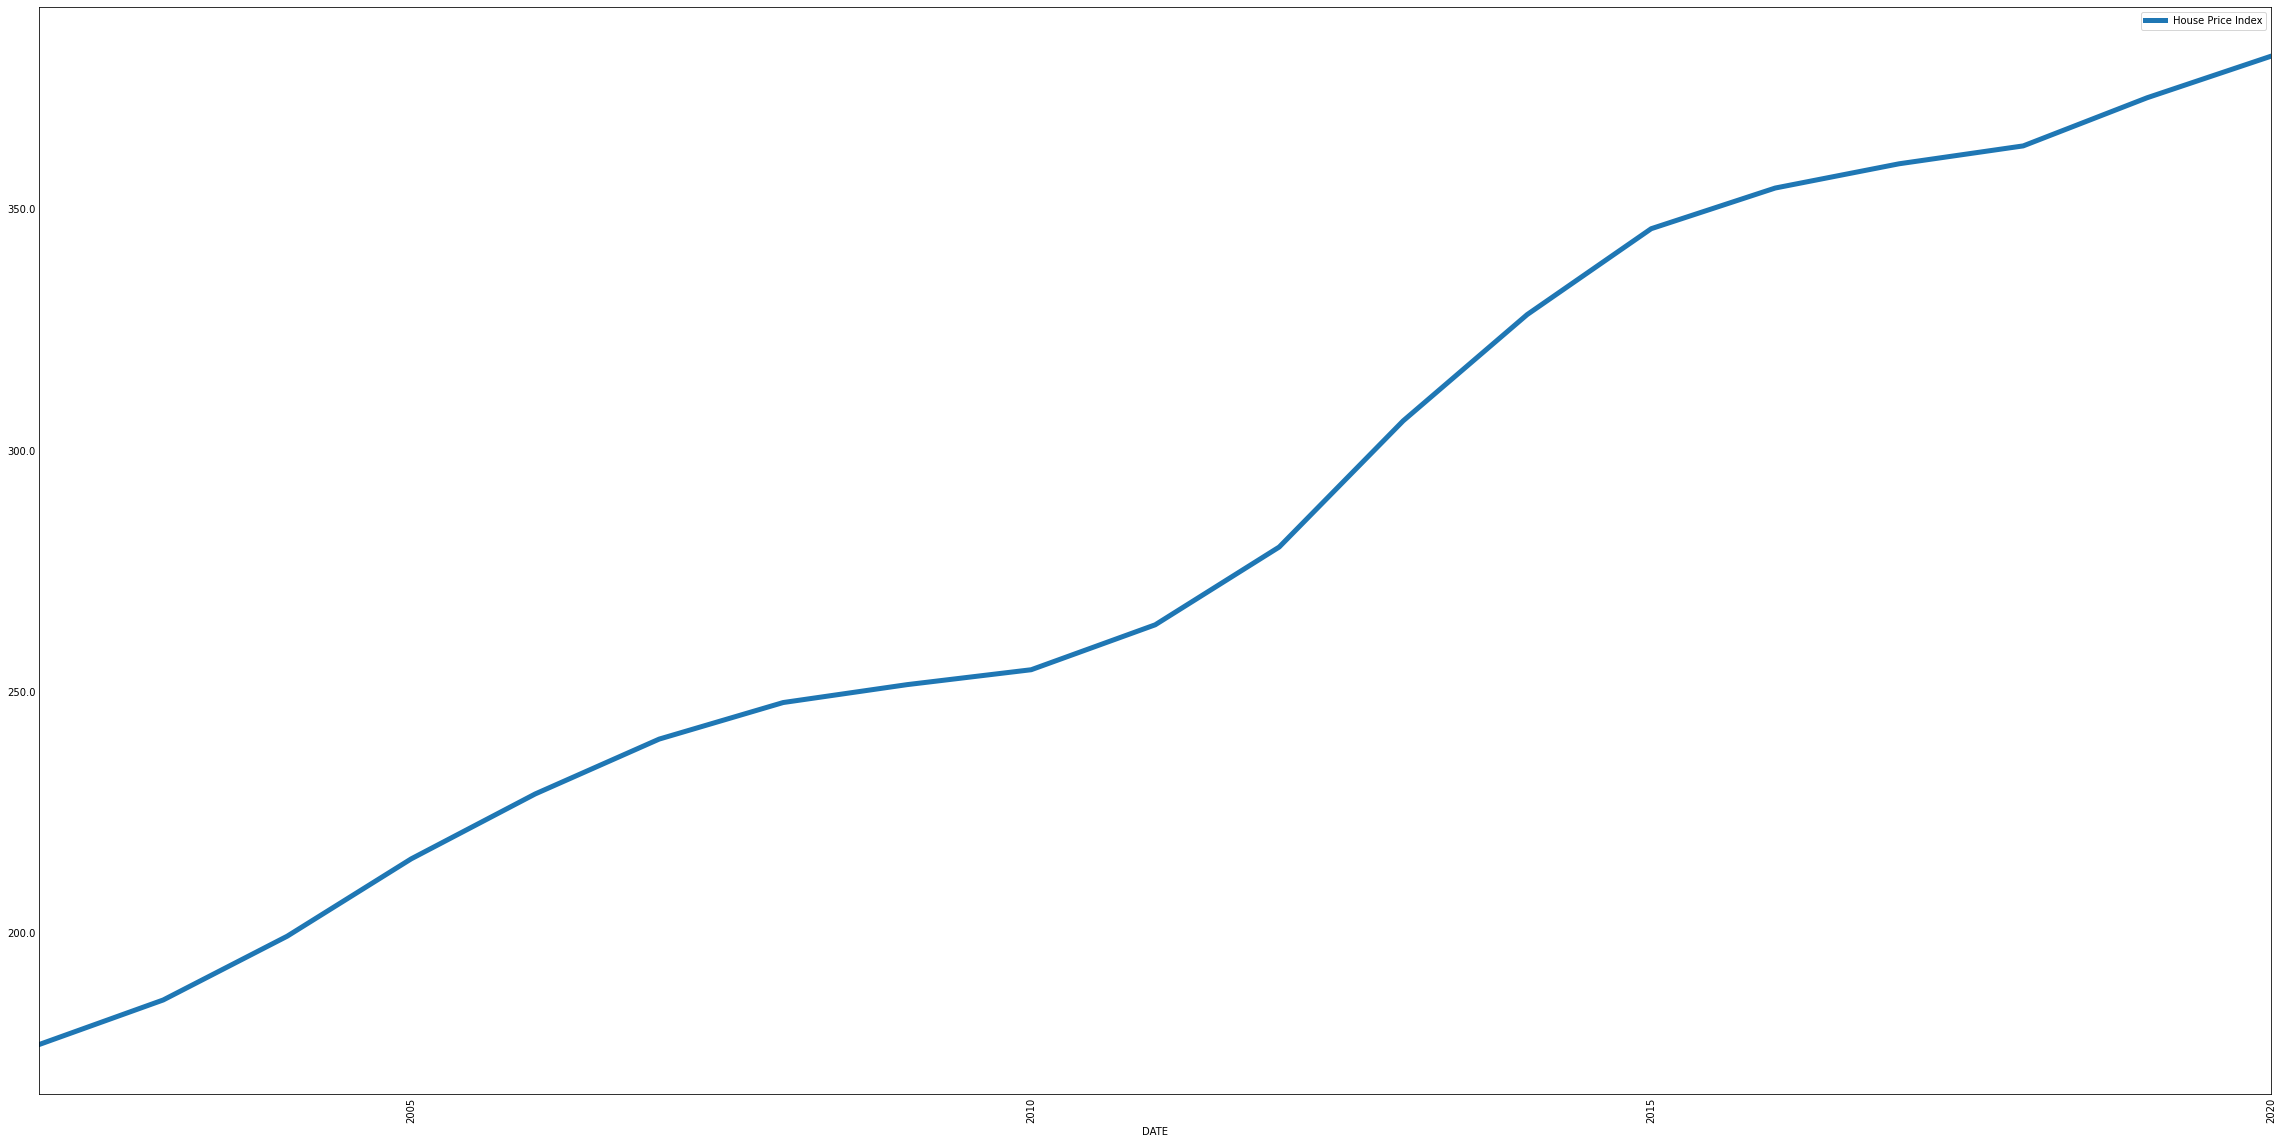

In [25]:
data1 = ["House Price Index"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

In [28]:
import pandas as pd
import pandas_datareader.data as web
from datlib.plots import * 
from datlib.FRED import *

data_codes  = {"Nationwide Homeownership Rate": "RSAHORUSQ156S"}

start = datetime.datetime(1980, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start, end = end, freq = "Q")

# M: National Homeownership Rate Since 1980

C:\Users\caden\Computational-Economics-Submissions\FP\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


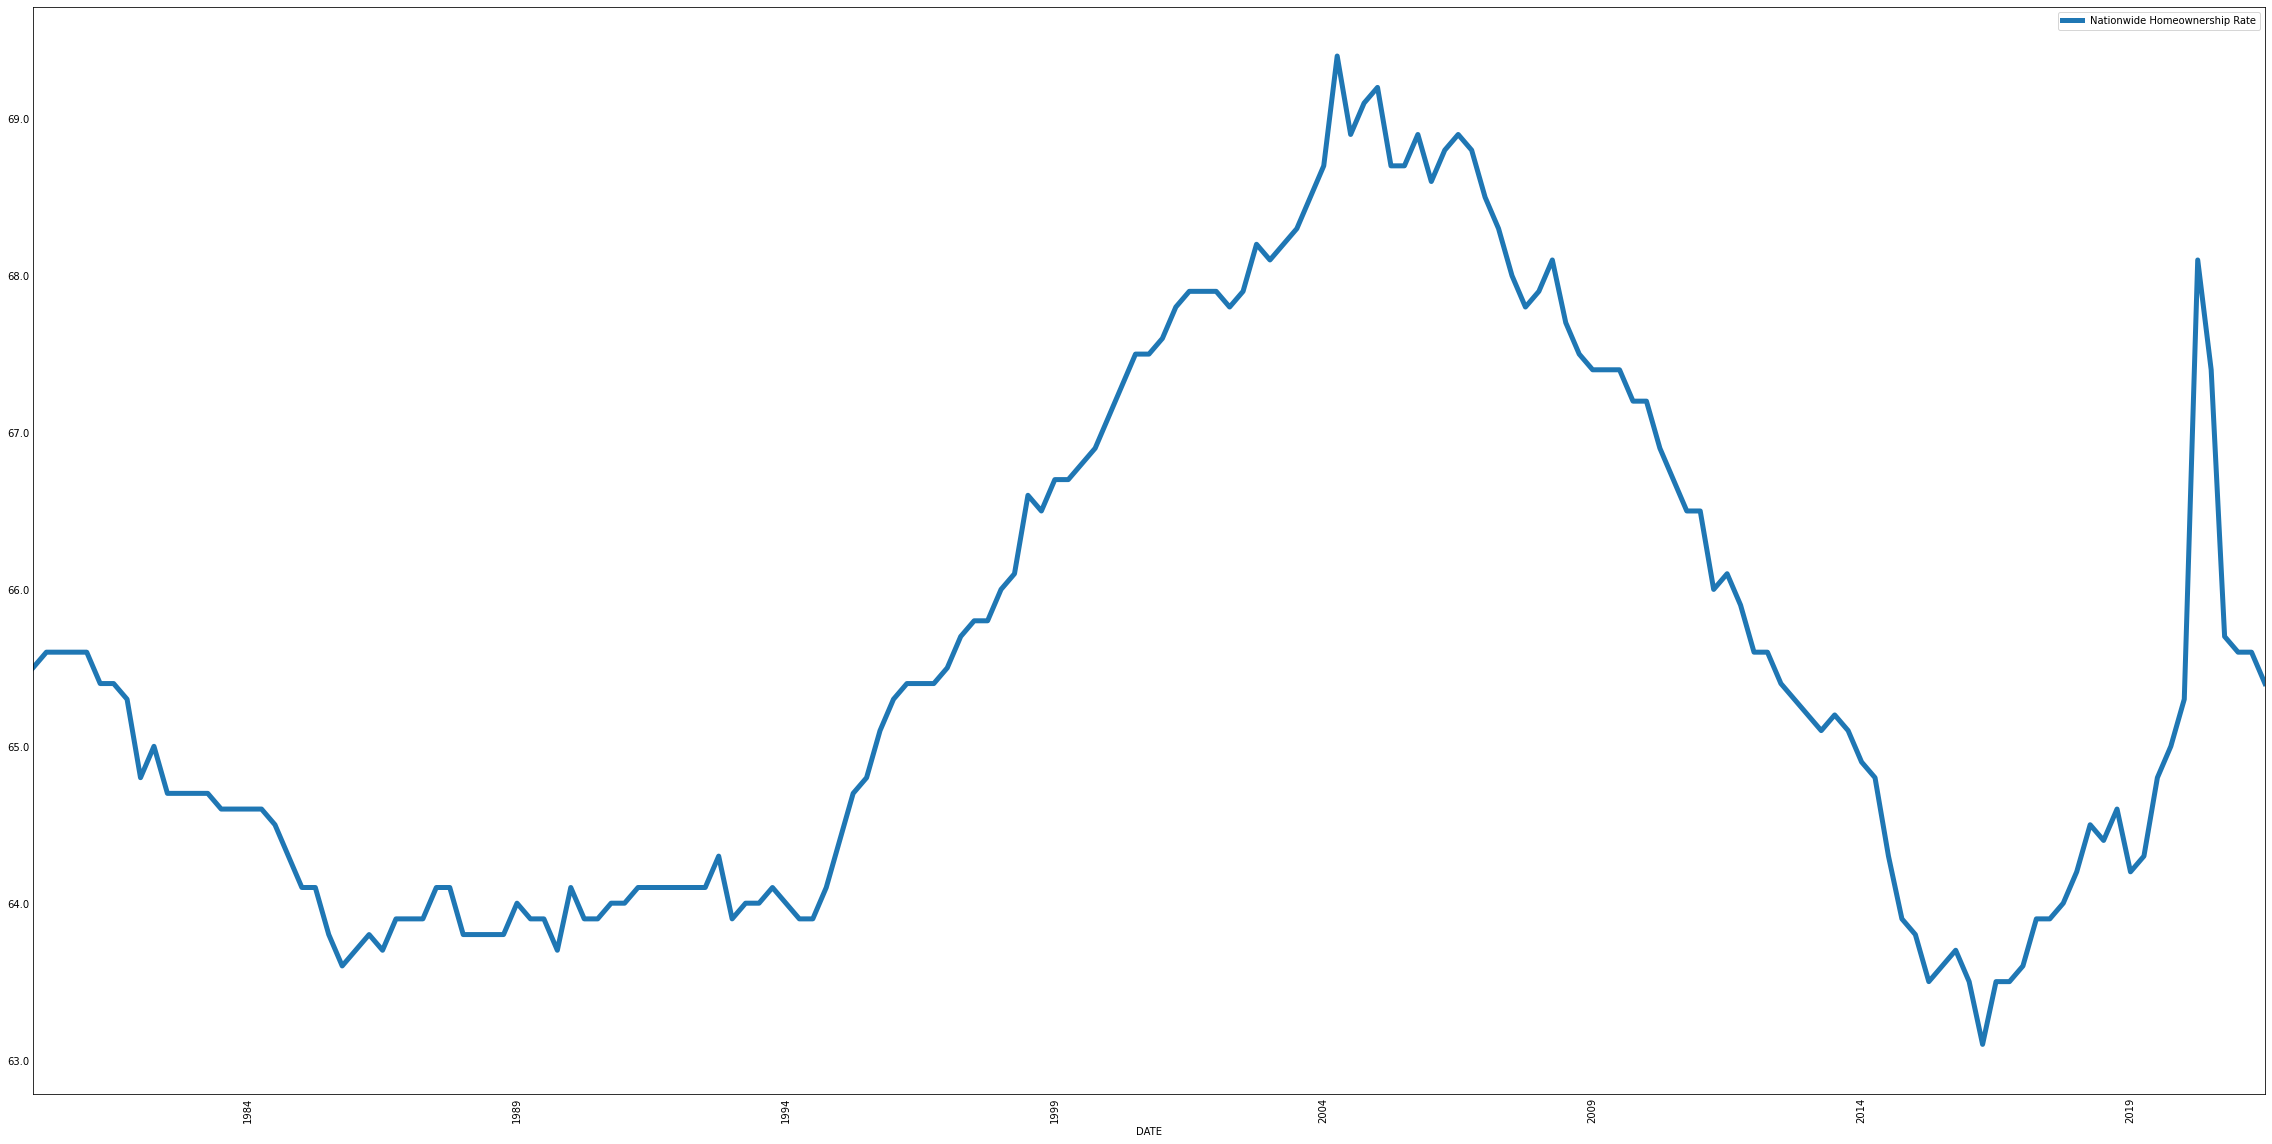

In [29]:
data1 = ["Nationwide Homeownership Rate"]
plot_lines(df = data[data1], linewidth = 5, figsize = (40, 20), pp = None)

# Sources

FRED: https://fred.stlouisfed.org/

Amadeo, K. (n.d.). Do regulations keep your money safer? The Balance. Retrieved December 17, 2021, from https://www.thebalance.com/financial-regulations-3306234

Campisi, N. (n.d.). Do rising mortgage rates trigger lower house prices? Bankrate. Retrieved December 17, 2021, from https://www.bankrate.com/finance/mortgages/rising-rates-lower-house-prices.aspx 

The Economist Newspaper. (n.d.). Home ownership is in decline. The Economist. Retrieved December 17, 2021, from https://www.economist.com/special-report/2020/01/16/home-ownership-is-in-decline 

Garber, J. (2016, February 11). Here's how the US housing market has been impacted by the 2008 crash. Business Insider. Retrieved December 17, 2021, from https://www.businessinsider.com/impact-of-2008-crash-on-housing-2016-2#:~:text=The%20financial%20crisis%20of%202008%20created%20the%20biggest,of%20renters%20to%20owners%20to%2043.3%25%20from%2038.5%25 

Hoffower, H. (2019, April 29). Homeownership across America is on the decline for the first time since 2017, and millennials are partially to blame. Business Insider. Retrieved December 17, 2021, from https://www.businessinsider.com/millennials-delaying-buying-homes-us-homeownership-decline-2019-4#:~:text=Homeownership%20is%20declining%20across%20America%2C%20largely%20because%20of,Laura%20Kusisto%20of%20The%20Wall%20Street%20Journal%20. 

Homeownership and the American dream. (n.d.). Retrieved December 17, 2021, from https://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.32.1.31 

Homeownership and unemployment - NMHC. (n.d.). Retrieved December 17, 2021, from https://www.nmhc.org/uploadedFiles/Articles/Research/Homeownership%20and%20Unemployment.pdf 

Housing Policy, Monetary Policy,  and the Great Recession. (n.d.). Retrieved December 17, 2021, from https://www.mercatus.org/system/files/sumner-housing-recession-mercatus-research-v2.pdf 

Housing prices and macroeconomic factors ... - gssinst.org. (n.d.). Retrieved December 17, 2021, from https://www.gssinst.org/irer/wp-content/uploads/2020/10/no-6-housing.pdf 

Is Homeownership Still an Effective Means of Building Wealth for Low-income and Minority Households? (Was it Ever?). (n.d.). Retrieved December 17, 2021, from https://www.jchs.harvard.edu/sites/default/files/hbtl-06.pdf 

Low-income homeownership: Benefits, barriers and predictors for families in rural areas: (n.d.). Retrieved December 17, 2021, from https://lib.dr.iastate.edu/cgi/viewcontent.cgi?article=1613&amp;context=etd 

Mezza, A., Ringo, D., Sherlund, S., &amp; Sommer, K. (2020, January 1). Student loans and homeownership: Journal of labor economics: Vol 38, no 1. Journal of Labor Economics. Retrieved December 17, 2021, from https://www.journals.uchicago.edu/doi/10.1086/704609 

North Dakota population 2021. North Dakota Population 2021 (Demographics, Maps, Graphs). (n.d.). Retrieved December 17, 2021, from https://worldpopulationreview.com/states/north-dakota-population 

Richman, S., Soave, R., Britschgi, C., Suderman, P., &amp; Greenhut, S. (2012, October 14). Clinton's legacy: The financial and housing meltdown. Reason.com. Retrieved December 17, 2021, from https://reason.com/2012/10/14/clintons-legacy-the-financial-and-housin/ 
Schuetz, J. (2019, April 29). Renting the american dream: Why homeownership shouldn't be a prerequisite for middle-class financial security. Brookings. Retrieved December 17, 2021, from https://www.brookings.edu/blog/up-front/2019/02/13/renting-the-american-dream-why-homeownership-shouldnt-be-a-pre-requisite-for-middle-class-financial-security/ 
The sustainability of homeownership: Factors affecting the ... (n.d.). Retrieved December 17, 2021, from https://www.huduser.gov/Publications/pdf/homeownsustainability.pdf 
Trends in homeownership: Race, demographics, and income. (n.d.). Retrieved December 17, 2021, from https://www.researchgate.net/publication/23529690_Trends_in_Homeownership_Race_Demographics_and_Income 
Trulia. (2015, May 13). Why millennials love renting. Forbes. Retrieved December 17, 2021, from https://www.forbes.com/sites/trulia/2014/10/07/why-millennials-love-renting/?sh=18853f0e74d1 
Weinberg, J. (n.d.). The great recession and its aftermath. Federal Reserve History. Retrieved December 17, 2021, from https://www.federalreservehistory.org/essays/great-recession-and-its-aftermath 
Why more people are renting. Apartment Living Tips - Apartment Tips from ApartmentGuide.com. (2021, June 2). Retrieved December 17, 2021, from https://www.apartmentguide.com/blog/why-do-you-prefer-to-rent/ 
Yun, L. (2016, August 12). Why homeownership matters. Forbes. Retrieved December 17, 2021, from https://www.forbes.com/sites/lawrenceyun/2016/08/12/why-homeownership-matters/?sh=23e31246480f 